In [4]:
import os
import torchaudio
import torchaudio.transforms as T
from pathlib import Path
import torch
import random

# Konfigurasi
SOURCE_DIR = "audio_emotions"
TARGET_DIR = "dataset_audio_emotions_16khz_padded_4emotion_592"
TARGET_SR = 16000
TARGET_DURATION_SEC = 4
TARGET_NUM_SAMPLES = TARGET_SR * TARGET_DURATION_SEC
MAX_FILES_PER_CLASS = 592

# Seed untuk random sampling reproducible
random.seed(42)

# Pastikan folder output ada
os.makedirs(TARGET_DIR, exist_ok=True)

# Fungsi padding atau trimming
def pad_or_trim(waveform, target_num_samples):
    num_samples = waveform.shape[1]
    if num_samples > target_num_samples:
        return waveform[:, :target_num_samples]
    elif num_samples < target_num_samples:
        padding = target_num_samples - num_samples
        return torch.nn.functional.pad(waveform, (0, padding))
    else:
        return waveform

# Proses semua folder emosi
# for emotion in ["Angry", "Happy", "Neutral", "Suprised", "Disgusted", "Sad"]:
for emotion in [ "Happy", "Neutral", "Surprised", "Disgusted"]:
    print(f"🔁 Processing: {emotion}")
    src_folder = os.path.join(SOURCE_DIR, emotion)
    tgt_folder = os.path.join(TARGET_DIR, emotion)
    os.makedirs(tgt_folder, exist_ok=True)

    # Ambil file WAV dan acak
    files = [f for f in os.listdir(src_folder) if f.endswith(".wav")]
    random.shuffle(files)
    files = files[:MAX_FILES_PER_CLASS]

    for idx, filename in enumerate(files):
        src_path = os.path.join(src_folder, filename)
        tgt_path = os.path.join(tgt_folder, f"{emotion.lower()}_{idx:03}.wav")

        try:
            waveform, sr = torchaudio.load(src_path)

            # Resample jika perlu
            if sr != TARGET_SR:
                resampler = T.Resample(orig_freq=sr, new_freq=TARGET_SR)
                waveform = resampler(waveform)

            # Mono-kan audio jika stereo
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)

            # Trim atau pad ke 4 detik
            waveform = pad_or_trim(waveform, TARGET_NUM_SAMPLES)

            # Simpan
            torchaudio.save(tgt_path, waveform, TARGET_SR)
        except Exception as e:
            print(f"⚠️ Gagal memproses {filename}: {e}")

print("✅ Selesai. Semua file telah di-random, di-resample ke 16kHz, dan disimpan 4 detik.")


🔁 Processing: Happy
🔁 Processing: Neutral
🔁 Processing: Surprised
🔁 Processing: Disgusted
✅ Selesai. Semua file telah di-random, di-resample ke 16kHz, dan disimpan 4 detik.


In [2]:
import os
import torchaudio
import torchaudio.transforms as T
from pathlib import Path
import torch
import random

# Konfigurasi
SOURCE_DIR = "dataset_audio_emotions_16khz_padded"
TARGET_DIR = "dataset_audio_emotions_16khz_4padded_4emotions_592"
TARGET_SR = 16000
TARGET_DURATION_SEC = 4
TARGET_NUM_SAMPLES = TARGET_SR * TARGET_DURATION_SEC
MAX_FILES_PER_CLASS = 592

# Seed untuk random sampling reproducible
random.seed(42)

# Pastikan folder output ada
os.makedirs(TARGET_DIR, exist_ok=True)

# Fungsi padding atau trimming
def pad_or_trim(waveform, target_num_samples):
    num_samples = waveform.shape[1]
    if num_samples > target_num_samples:
        return waveform[:, :target_num_samples]
    elif num_samples < target_num_samples:
        padding = target_num_samples - num_samples
        return torch.nn.functional.pad(waveform, (0, padding))
    else:
        return waveform

# Proses semua folder emosi
for emotion in ["Neutral", "Happy", "Surprised", "Disgust"]:
    print(f"🔁 Processing: {emotion}")
    src_folder = os.path.join(SOURCE_DIR, emotion)
    tgt_folder = os.path.join(TARGET_DIR, emotion)
    os.makedirs(tgt_folder, exist_ok=True)

    # Ambil file WAV dan acak
    files = [f for f in os.listdir(src_folder) if f.endswith(".wav")]
    random.shuffle(files)
    files = files[:MAX_FILES_PER_CLASS]

    for idx, filename in enumerate(files):
        src_path = os.path.join(src_folder, filename)
        tgt_path = os.path.join(tgt_folder, f"{emotion.lower()}_{idx:03}.wav")

        try:
            waveform, sr = torchaudio.load(src_path)

            # Resample jika perlu
            if sr != TARGET_SR:
                resampler = T.Resample(orig_freq=sr, new_freq=TARGET_SR)
                waveform = resampler(waveform)

            # Mono-kan audio jika stereo
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)

            # Trim atau pad ke 4 detik
            waveform = pad_or_trim(waveform, TARGET_NUM_SAMPLES)

            # Simpan
            torchaudio.save(tgt_path, waveform, TARGET_SR)
        except Exception as e:
            print(f"⚠️ Gagal memproses {filename}: {e}")

print("✅ Selesai. Semua file telah di-random, di-resample ke 16kHz, dan disimpan 4 detik.")


🔁 Processing: Neutral
🔁 Processing: Happy
🔁 Processing: Surprised


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset_audio_emotions_16khz_padded\\Surprised'

In [ ]:
import os
import torchaudio
import torchaudio.transforms as T
from pathlib import Path
import torch
import random

# Konfigurasi
SOURCE_DIR = "audio_emotions"
TARGET_DIR = "dataset_audio_emotions_16khz_4padded"
TARGET_SR = 16000
TARGET_DURATION_SEC = 4
TARGET_NUM_SAMPLES = TARGET_SR * TARGET_DURATION_SEC
MAX_FILES_PER_CLASS = 1000

# Seed untuk random sampling reproducible
random.seed(42)

# Pastikan folder output ada
os.makedirs(TARGET_DIR, exist_ok=True)

# Fungsi padding atau trimming
def pad_or_trim(waveform, target_num_samples):
    num_samples = waveform.shape[1]
    if num_samples > target_num_samples:
        return waveform[:, :target_num_samples]
    elif num_samples < target_num_samples:
        padding = target_num_samples - num_samples
        return torch.nn.functional.pad(waveform, (0, padding))
    else:
        return waveform

# Proses semua folder emosi
for emotion in ["Angry", "Happy", "Neutral", "Disgusted", "Sad"]:
    print(f"🔁 Processing: {emotion}")
    src_folder = os.path.join(SOURCE_DIR, emotion)
    tgt_folder = os.path.join(TARGET_DIR, emotion)
    os.makedirs(tgt_folder, exist_ok=True)

    # Ambil file WAV dan acak
    files = [f for f in os.listdir(src_folder) if f.endswith(".wav")]
    random.shuffle(files)
    files = files[:MAX_FILES_PER_CLASS]

    for idx, filename in enumerate(files):
        src_path = os.path.join(src_folder, filename)
        tgt_path = os.path.join(tgt_folder, f"{emotion.lower()}_{idx:03}.wav")

        try:
            waveform, sr = torchaudio.load(src_path)

            # Resample jika perlu
            if sr != TARGET_SR:
                resampler = T.Resample(orig_freq=sr, new_freq=TARGET_SR)
                waveform = resampler(waveform)

            # Mono-kan audio jika stereo
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)

            # Trim atau pad ke 4 detik
            waveform = pad_or_trim(waveform, TARGET_NUM_SAMPLES)

            # Simpan
            torchaudio.save(tgt_path, waveform, TARGET_SR)
        except Exception as e:
            print(f"⚠️ Gagal memproses {filename}: {e}")

print("✅ Selesai. Semua file telah di-random, di-resample ke 16kHz, dan disimpan 4 detik.")


🔁 Processing: Angry


KeyboardInterrupt: 

In [3]:
import os
import shutil

source_root = 'dataset indo'
target_root = 'datasetindo_sorted'

emotion_map = {
    '01': 'neutral',
    '02': 'happy',
    '03': 'surprise',
    '04': 'disgust',
    '05': 'disappointed'
}

os.makedirs(target_root, exist_ok=True)

for emotion_folder in emotion_map.values():
    os.makedirs(os.path.join(target_root, emotion_folder), exist_ok=True)

for i in range(1, 11):
    actor_folder = f'actor_{i:02}'  # <- Perbaikan prefix nol
    actor_path = os.path.join(source_root, actor_folder)

    print(f"Memproses folder: {actor_path}")

    if not os.path.isdir(actor_path):
        print(f"Folder tidak ditemukan: {actor_path}")
        continue

    for filename in os.listdir(actor_path):
        if filename.endswith('.wav') and len(filename.split('-')) == 4:
            parts = filename.split('-')
            emotion_code = parts[1]

            if emotion_code in emotion_map:
                emotion_label = emotion_map[emotion_code]
                src_path = os.path.join(actor_path, filename)
                dst_path = os.path.join(target_root, emotion_label, filename)

                shutil.copy2(src_path, dst_path)
                print(f"Copied {filename} to {emotion_label}/")
            else:
                print(f"Kode emosi tidak dikenali: {filename}")
        else:
            print(f"File diabaikan (format tidak valid): {filename}")


Memproses folder: dataset indo\actor_01
Copied 01-01-01-01.wav to neutral/
Copied 01-01-01-02.wav to neutral/
Copied 01-01-01-03.wav to neutral/
Copied 01-01-02-01.wav to neutral/
Copied 01-01-02-02.wav to neutral/
Copied 01-01-02-03.wav to neutral/
Copied 01-02-01-01.wav to happy/
Copied 01-02-01-02.wav to happy/
Copied 01-02-01-03.wav to happy/
Copied 01-02-02-01.wav to happy/
Copied 01-02-02-02.wav to happy/
Copied 01-02-02-03.wav to happy/
Copied 01-03-01-01.wav to surprise/
Copied 01-03-01-02.wav to surprise/
Copied 01-03-01-03.wav to surprise/
Copied 01-03-02-01.wav to surprise/
Copied 01-03-02-02.wav to surprise/
Copied 01-03-02-03.wav to surprise/
Copied 01-04-01-01.wav to disgust/
Copied 01-04-01-02.wav to disgust/
Copied 01-04-01-03.wav to disgust/
Copied 01-04-02-01.wav to disgust/
Copied 01-04-02-02.wav to disgust/
Copied 01-04-02-03.wav to disgust/
Copied 01-05-01-01.wav to disappointed/
Copied 01-05-01-02.wav to disappointed/
Copied 01-05-01-03.wav to disappointed/
Copied

In [2]:
import os
import shutil

source_root = 'ravdess'  # Folder utama yang berisi subfolder Actor_01, Actor_02, ...
target_root = 'datasetravdess_sorted'

# Pemetaan emosi
emotion_map = {
    '01': 'neutral',
    '03': 'happy',
    '07': 'disgust',
    '08': 'surprise'
}

# Buat folder emosi di folder tujuan
os.makedirs(target_root, exist_ok=True)
for emotion_label in emotion_map.values():
    os.makedirs(os.path.join(target_root, emotion_label), exist_ok=True)

# Telusuri setiap folder aktor (Actor_01 hingga Actor_24)
for actor_folder in os.listdir(source_root):
    actor_path = os.path.join(source_root, actor_folder)
    
    if not os.path.isdir(actor_path):
        print(f"Dilewati (bukan folder): {actor_folder}")
        continue

    for filename in os.listdir(actor_path):
        if filename.endswith('.wav') and len(filename.split('-')) == 7:
            parts = filename.split('-')
            modality = parts[0]
            channel = parts[1]
            emotion_code = parts[2]

            if modality == '03' and channel == '01' and emotion_code in emotion_map:
                emotion_label = emotion_map[emotion_code]
                src_path = os.path.join(actor_path, filename)
                dst_path = os.path.join(target_root, emotion_label, filename)

                shutil.copy2(src_path, dst_path)
                print(f"Copied {filename} to {emotion_label}/")
            else:
                print(f"Dilewati (tidak sesuai filter): {filename}")
        else:
            print(f"Format filename tidak valid: {filename}")


Copied 03-01-01-01-01-01-01.wav to neutral/
Copied 03-01-01-01-01-02-01.wav to neutral/
Copied 03-01-01-01-02-01-01.wav to neutral/
Copied 03-01-01-01-02-02-01.wav to neutral/
Dilewati (tidak sesuai filter): 03-01-02-01-01-01-01.wav
Dilewati (tidak sesuai filter): 03-01-02-01-01-02-01.wav
Dilewati (tidak sesuai filter): 03-01-02-01-02-01-01.wav
Dilewati (tidak sesuai filter): 03-01-02-01-02-02-01.wav
Dilewati (tidak sesuai filter): 03-01-02-02-01-01-01.wav
Dilewati (tidak sesuai filter): 03-01-02-02-01-02-01.wav
Dilewati (tidak sesuai filter): 03-01-02-02-02-01-01.wav
Dilewati (tidak sesuai filter): 03-01-02-02-02-02-01.wav
Copied 03-01-03-01-01-01-01.wav to happy/
Copied 03-01-03-01-01-02-01.wav to happy/
Copied 03-01-03-01-02-01-01.wav to happy/
Copied 03-01-03-01-02-02-01.wav to happy/
Copied 03-01-03-02-01-01-01.wav to happy/
Copied 03-01-03-02-01-02-01.wav to happy/
Copied 03-01-03-02-02-01-01.wav to happy/
Copied 03-01-03-02-02-02-01.wav to happy/
Dilewati (tidak sesuai filter): 

In [3]:
import os
import torchaudio
import torchaudio.transforms as T

# Konfigurasi
SOURCE_DIR = "datasetindo_sorted"
TARGET_DIR = "datasetindo_sorted_preprocess"
TARGET_SR = 16000
MAX_FILES_PER_CLASS = 592  # opsional, bisa diatur jika tetap ingin membatasi jumlah file

# Pastikan folder output ada
os.makedirs(TARGET_DIR, exist_ok=True)

# Proses semua folder emosi
for emotion in ["Disappointed", "Disgust", "Happy", "Neutral", "Surprise"]:
    print(f"🔁 Processing: {emotion}")
    src_folder = os.path.join(SOURCE_DIR, emotion)
    tgt_folder = os.path.join(TARGET_DIR, emotion)
    os.makedirs(tgt_folder, exist_ok=True)

    # Ambil file WAV tanpa pengacakan
    files = [f for f in os.listdir(src_folder) if f.endswith(".wav")]
    files = sorted(files)[:MAX_FILES_PER_CLASS]  # urutkan nama file dan batasi jumlah

    for idx, filename in enumerate(files):
        src_path = os.path.join(src_folder, filename)
        tgt_path = os.path.join(tgt_folder, f"{emotion.lower()}_{idx:03}.wav")

        try:
            waveform, sr = torchaudio.load(src_path)

            # Resample jika perlu
            if sr != TARGET_SR:
                resampler = T.Resample(orig_freq=sr, new_freq=TARGET_SR)
                waveform = resampler(waveform)

            # Mono-kan audio jika stereo
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)

            # Simpan
            torchaudio.save(tgt_path, waveform, TARGET_SR)
        except Exception as e:
            print(f"⚠️ Gagal memproses {filename}: {e}")

print("✅ Selesai. Semua file telah diproses dalam urutan asli, di-resample ke 16kHz, dan disimpan.")


🔁 Processing: Disappointed
🔁 Processing: Disgust
🔁 Processing: Happy
🔁 Processing: Neutral
🔁 Processing: Surprise
✅ Selesai. Semua file telah diproses dalam urutan asli, di-resample ke 16kHz, dan disimpan.


In [9]:
import os
import torchaudio
import torchaudio.transforms as T
import torch

# Konfigurasi
SOURCE_DIR = "datasetindo_sorted"
TARGET_DIR = "datasetindo_sorted_preprocess_3.5s"
TARGET_SR = 16000
TARGET_DURATION_SEC = 3.5
TARGET_NUM_SAMPLES = int(TARGET_SR * TARGET_DURATION_SEC)
MAX_FILES_PER_CLASS = 592  # Ubah jika ingin lebih sedikit

os.makedirs(TARGET_DIR, exist_ok=True)

def pad_or_trim(waveform, target_num_samples):
    num_samples = waveform.shape[1]
    if num_samples > target_num_samples:
        return waveform[:, :target_num_samples]
    elif num_samples < target_num_samples:
        padding = target_num_samples - num_samples
        return torch.nn.functional.pad(waveform, (0, padding))
    else:
        return waveform

for emotion in ["Disappointed", "Disgust", "Happy", "Neutral", "Surprise"]:
    print(f"🔁 Processing: {emotion}")
    src_folder = os.path.join(SOURCE_DIR, emotion)
    tgt_folder = os.path.join(TARGET_DIR, emotion)
    os.makedirs(tgt_folder, exist_ok=True)

    files = [f for f in os.listdir(src_folder) if f.endswith(".wav")]
    files = sorted(files)[:MAX_FILES_PER_CLASS]

    for idx, filename in enumerate(files):
        src_path = os.path.join(src_folder, filename)
        tgt_path = os.path.join(tgt_folder, f"{emotion.lower()}_{idx:03}.wav")

        try:
            waveform, sr = torchaudio.load(src_path)

            if sr != TARGET_SR:
                resampler = T.Resample(orig_freq=sr, new_freq=TARGET_SR)
                waveform = resampler(waveform)

            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)

            waveform = pad_or_trim(waveform, TARGET_NUM_SAMPLES)
            torchaudio.save(tgt_path, waveform, TARGET_SR)

        except Exception as e:
            print(f"⚠️ Gagal memproses {filename}: {e}")

print("✅ Selesai. Semua file telah diproses ke durasi 3.5 detik dan disimpan.")


🔁 Processing: Disappointed
🔁 Processing: Disgust
🔁 Processing: Happy
🔁 Processing: Neutral
🔁 Processing: Surprise
✅ Selesai. Semua file telah diproses ke durasi 3.5 detik dan disimpan.


In [1]:
import os
import random
import shutil

# Folder asal dan tujuan
base_dir = r"D:/ASVP-ESD-Update/Audio"
output_dir = r"D:/ASVP-ESD-Update/Filtered_Disappointment_English"

# Buat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Kriteria filter
target_emotion = "12"
target_vocal = "01"
target_ages = {"02", "03"}
target_language = "02"

# Loop setiap folder actor
for actor_id in range(0, 129):  # 0 sampai 128
    actor_folder = os.path.join(base_dir, f"actor_{actor_id}")
    if not os.path.isdir(actor_folder):
        continue

    # Loop setiap file di dalam folder actor
    for filename in os.listdir(actor_folder):
        if not filename.endswith(".wav"):
            continue
        
        # Pisahkan identifier dari nama file
        parts = filename.replace(".wav", "").split("-")
        if len(parts) < 10:
            continue  # Skip jika format tidak sesuai

        modality = parts[0]
        vocal_channel = parts[1]
        emotion = parts[2]
        intensity = parts[3]
        statement = parts[4]
        actor = parts[5]
        age = parts[6]
        source = parts[7]
        language = parts[8]

        # Terapkan filter
        if (
            emotion == target_emotion and
            vocal_channel == target_vocal and
            age in target_ages and
            language == target_language
        ):
            # Salin file ke folder output
            src_path = os.path.join(actor_folder, filename)
            dst_path = os.path.join(output_dir, filename)

            shutil.copy(src_path, dst_path)

print("Seleksi dan penyalinan selesai.")


Seleksi dan penyalinan selesai.


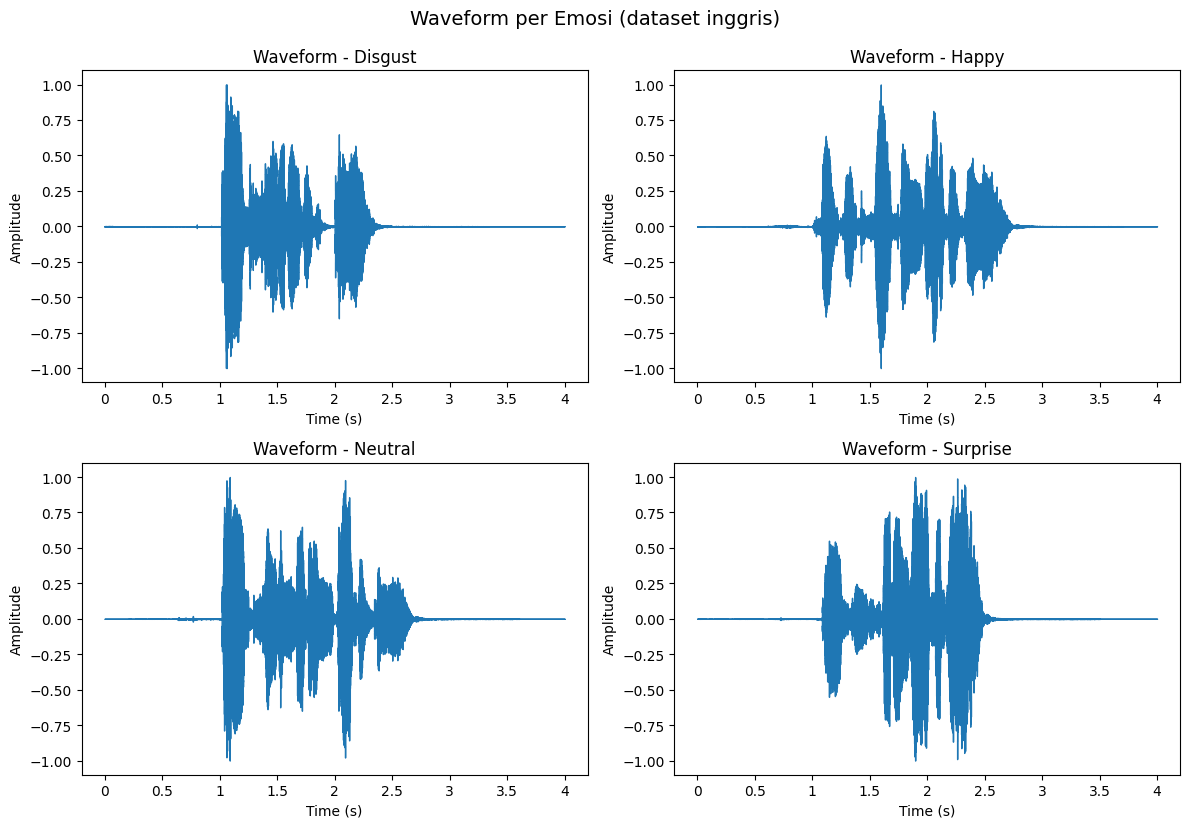

In [3]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path ke folder utama dataset
base_dir = r"C:\skripsi\normalized_audio_emotions"

# Kelas yang ingin divisualisasikan
classes = ["Disgust", "Happy", "Neutral", "Surprise"]

plt.figure(figsize=(12, 8))
for i, emotion in enumerate(classes):
    folder_path = os.path.join(base_dir, emotion)
    file_list = [f for f in os.listdir(folder_path) if f.endswith(".wav")]

    if not file_list:
        print(f"[!] Tidak ditemukan file WAV dalam folder: {emotion}")
        continue

    file_path = os.path.join(folder_path, file_list[0])

    # Load audio dengan SR asli dulu
    y, sr_original = librosa.load(file_path, sr=None)

    # Resample ke 16kHz jika perlu
    target_sr = 16000
    if sr_original != target_sr:
        y = librosa.resample(y, orig_sr=sr_original, target_sr=target_sr)
        sr = target_sr
    else:
        sr = sr_original

    # Plot waveform
    plt.subplot(2, 2, i + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {emotion}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.suptitle("Waveform per Emosi (dataset inggris)", y=1.03, fontsize=14)
plt.show()


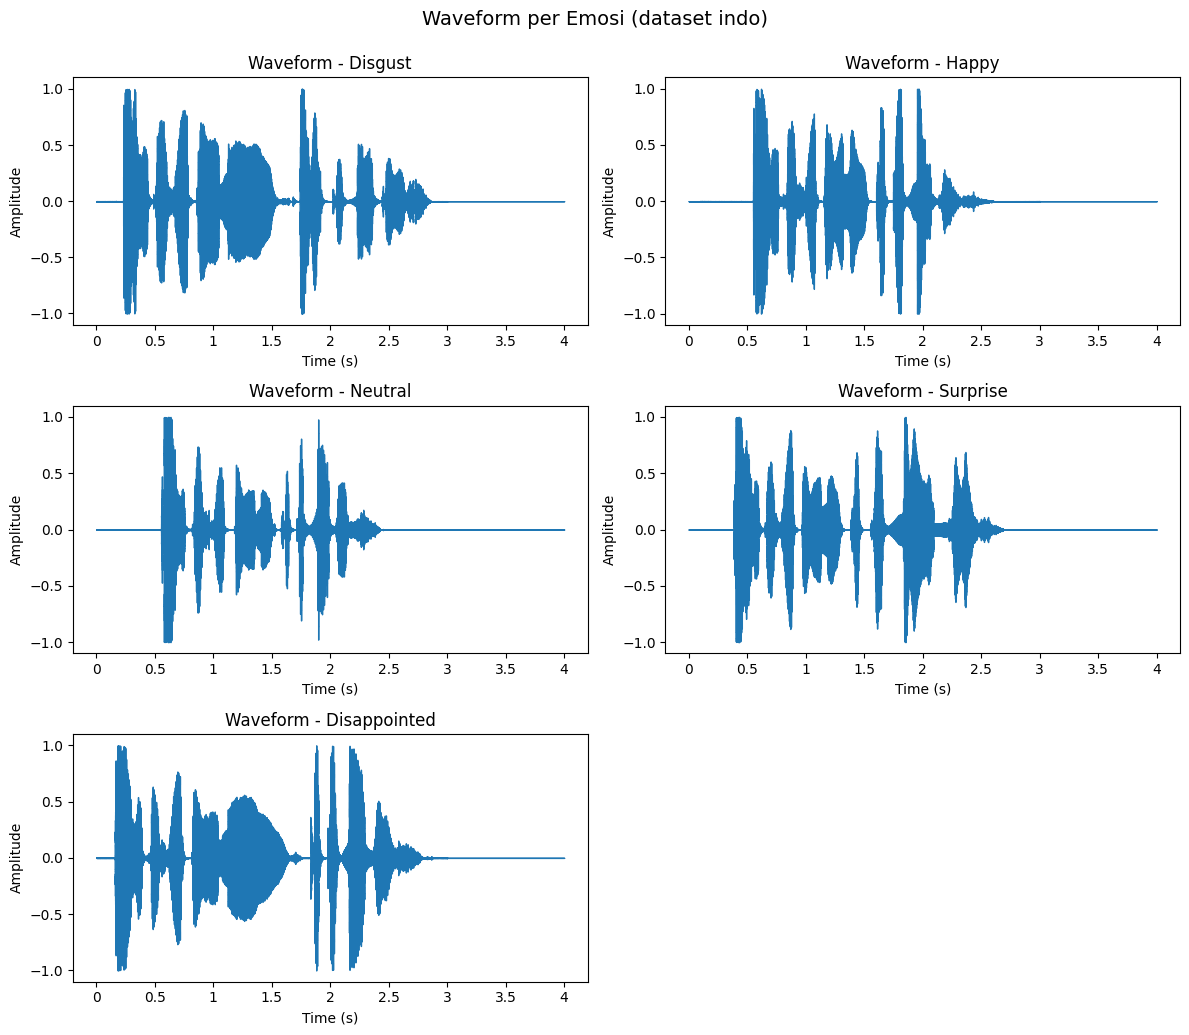

In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path ke folder utama dataset
base_dir = r"C:\skripsi\datasetindo_sorted_preprocess_4s"

# Daftar kelas yang ingin divisualisasikan
classes = ["Disgust", "Happy", "Neutral", "Surprise", "Disappointed"]  # Tambahkan kelas ke-5 di sini

# Ukuran plot dinamis
plt.figure(figsize=(12, 10))

for i, emotion in enumerate(classes):
    folder_path = os.path.join(base_dir, emotion)
    file_list = [f for f in os.listdir(folder_path) if f.endswith(".wav")]

    if not file_list:
        print(f"[!] Tidak ditemukan file WAV dalam folder: {emotion}")
        continue

    file_path = os.path.join(folder_path, file_list[0])

    # Load dengan SR asli
    y, sr_original = librosa.load(file_path, sr=None)

    # Resample jika perlu
    target_sr = 16000
    if sr_original != target_sr:
        y = librosa.resample(y, orig_sr=sr_original, target_sr=target_sr)
        sr = target_sr
    else:
        sr = sr_original

    # Plot subplot
    plt.subplot(3, 2, i + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {emotion}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

# Kosongkan subplot ke-6 jika tidak dipakai
if len(classes) < 6:
    plt.subplot(3, 2, 6)
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Waveform per Emosi (dataset indo)", y=1.03, fontsize=14)
plt.show()


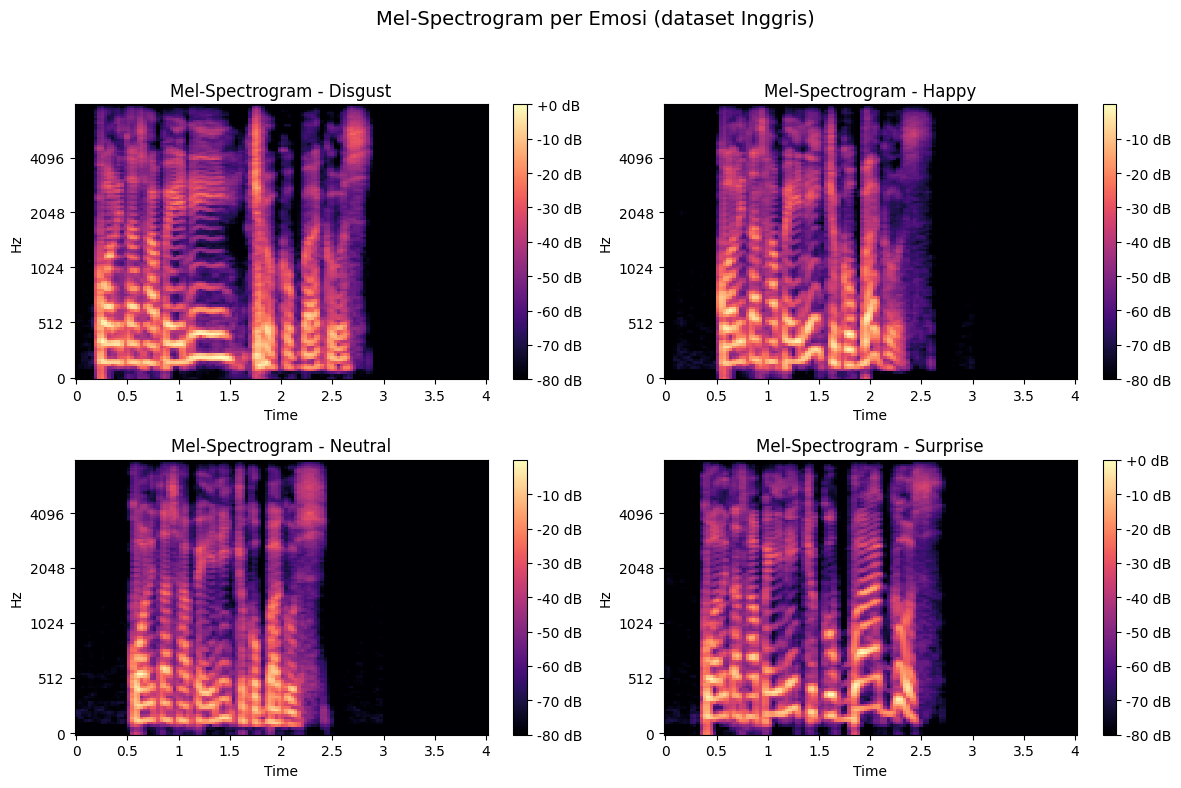

In [14]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Lokasi folder dataset
base_dir = "C:/skripsi/datasetindo_sorted_preprocess_4s"
classes = ["Disgust", "Happy", "Neutral", "Surprise"]

# Buat subplot
plt.figure(figsize=(12, 8))
for i, emotion in enumerate(classes):
    # Ambil satu file pertama dari masing-masing folder
    folder_path = os.path.join(base_dir, emotion)
    file_list = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
    if not file_list:
        continue
    file_path = os.path.join(folder_path, file_list[0])
    
    # Load audio
    y, sr = librosa.load(file_path, sr=16000)

    # Hitung Mel-Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Plot
    plt.subplot(2, 2, i + 1)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel-Spectrogram - {emotion}")
    plt.tight_layout()

plt.suptitle("Mel-Spectrogram per Emosi (dataset Inggris)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


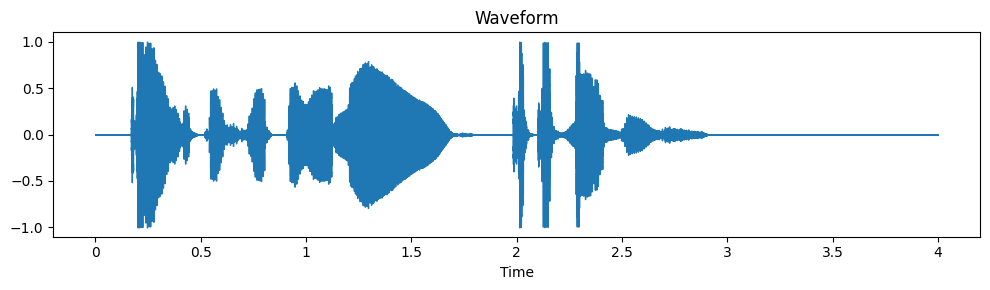

Embedding shape: torch.Size([199, 768])


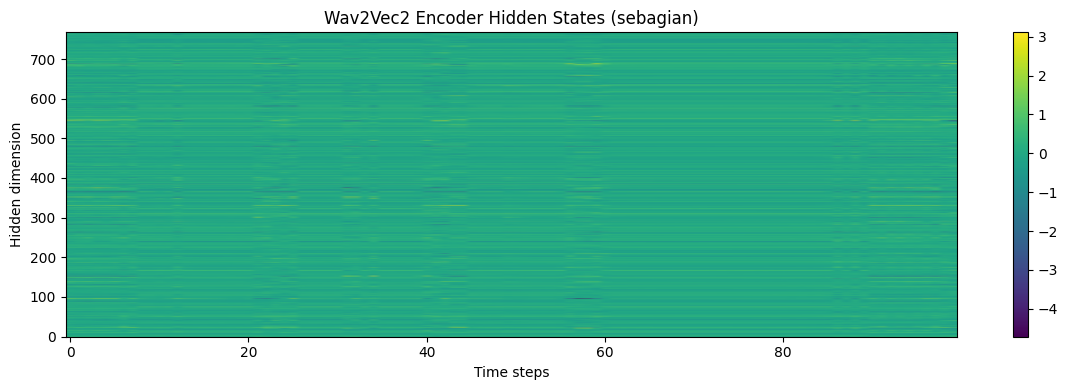

In [18]:
import torch
import torchaudio
from transformers import Wav2Vec2Model, Wav2Vec2Processor
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Load model dan processor pre-trained
model_name = "facebook/wav2vec2-base"
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2Model.from_pretrained(model_name)

# Load file audio
file_path = "C:/skripsi/datasetindo_sorted_preprocess_4s/Disappointed/disappointed_001.wav"  # Ganti dengan path file Anda
waveform, sr = torchaudio.load(file_path)

# Resample jika bukan 16kHz
if sr != 16000:
    resampler = torchaudio.transforms.Resample(sr, 16000)
    waveform = resampler(waveform)

# Plot waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(waveform[0].numpy(), sr=16000)
plt.title("Waveform")
plt.tight_layout()
plt.show()

# Preprocessing
inputs = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt")

# Forward ke model
with torch.no_grad():
    outputs = model(**inputs)

# Ambil representasi numerik (hidden states dari encoder)
embeddings = outputs.last_hidden_state.squeeze(0)  # Shape: [seq_len, hidden_size]
print("Embedding shape:", embeddings.shape)  # Misal: [300, 768]

# Plot sebagian besar nilai embedding
plt.figure(figsize=(12, 4))
plt.imshow(embeddings[:100].T, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Wav2Vec2 Encoder Hidden States (sebagian)")
plt.xlabel("Time steps")
plt.ylabel("Hidden dimension")
plt.tight_layout()
plt.show()


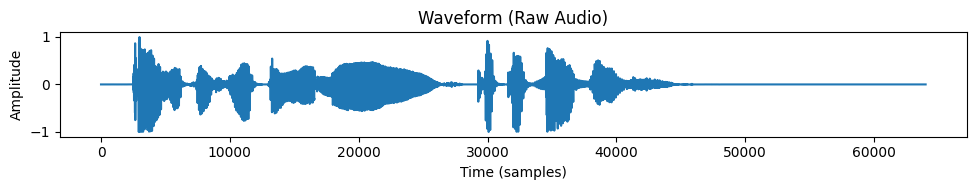

=== Bentuk Representasi Numerik ===
Shape: torch.Size([1, 512, 199])


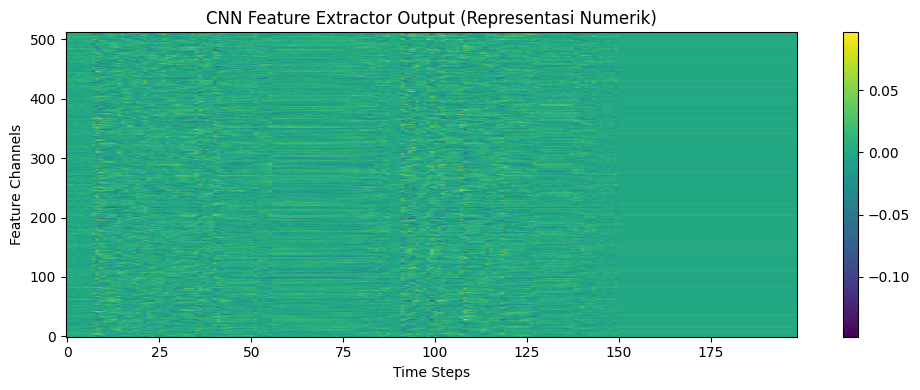

In [19]:
import torch
import librosa
import matplotlib.pyplot as plt
from transformers import Wav2Vec2Model, Wav2Vec2Processor

# Load model & processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")

# Load audio (pastikan file audio .wav Anda ada)
file_path = "C:/skripsi/datasetindo_sorted_preprocess_4s/Disappointed/disappointed_000.wav"  # ganti path ini
waveform, sr = librosa.load(file_path, sr=16000)  # Wav2Vec expects 16kHz

# Visualisasi waveform mentah
plt.figure(figsize=(10, 2))
plt.plot(waveform)
plt.title("Waveform (Raw Audio)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Preprocessing: konversi ke tensor dan padding
inputs = processor(waveform, sampling_rate=16000, return_tensors="pt")

# Ambil fitur dari CNN encoder (sebelum transformer)
with torch.no_grad():
    features = model.feature_extractor(inputs.input_values)

print("=== Bentuk Representasi Numerik ===")
print("Shape:", features.shape)  # [batch, feature_dim, time_steps]

# Visualisasi sebagai gambar (numerik)
features_np = features.squeeze().numpy()

plt.figure(figsize=(10, 4))
plt.imshow(features_np, aspect='auto', origin='lower', cmap='viridis')
plt.title("CNN Feature Extractor Output (Representasi Numerik)")
plt.xlabel("Time Steps")
plt.ylabel("Feature Channels")
plt.colorbar()
plt.tight_layout()
plt.show()


c:\skripsi\env\lib\site-packages\transformers\configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


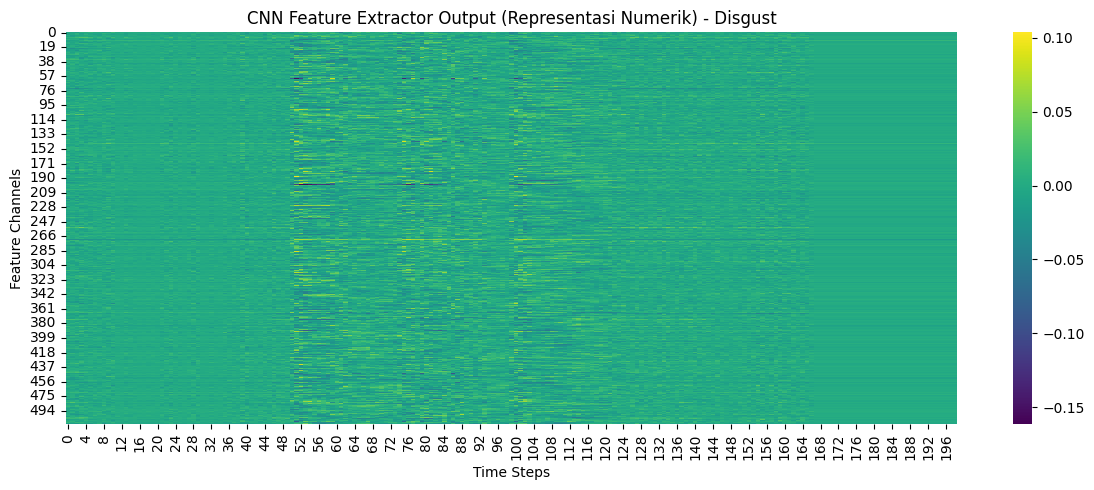

Cuplikan Representasi Numerik [Disgust]:
[[-0.0028  -0.00206 -0.01128  0.00461  0.00336]
 [-0.00702 -0.00459  0.01032 -0.00985  0.00103]
 [-0.01049 -0.00218  0.00669 -0.00601  0.0075 ]
 [ 0.01246  0.00332  0.01377  0.0075   0.01246]
 [ 0.00541 -0.0134  -0.00579 -0.00404 -0.00143]]


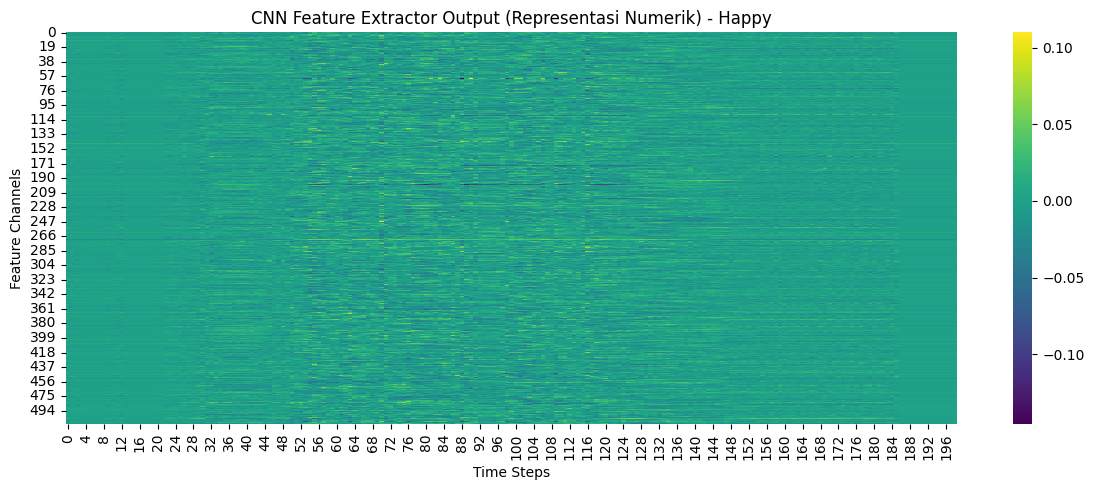

Cuplikan Representasi Numerik [Happy]:
[[ 8.080e-03  3.730e-03 -3.160e-03  1.860e-03  6.600e-04]
 [-2.630e-03  1.000e-04 -3.940e-03 -3.130e-03 -1.870e-03]
 [-1.143e-02 -8.660e-03 -7.700e-03 -7.150e-03 -6.840e-03]
 [ 9.400e-04  5.630e-03  5.120e-03  6.740e-03  5.270e-03]
 [-6.200e-04 -5.070e-03 -3.800e-03 -2.590e-03 -3.320e-03]]


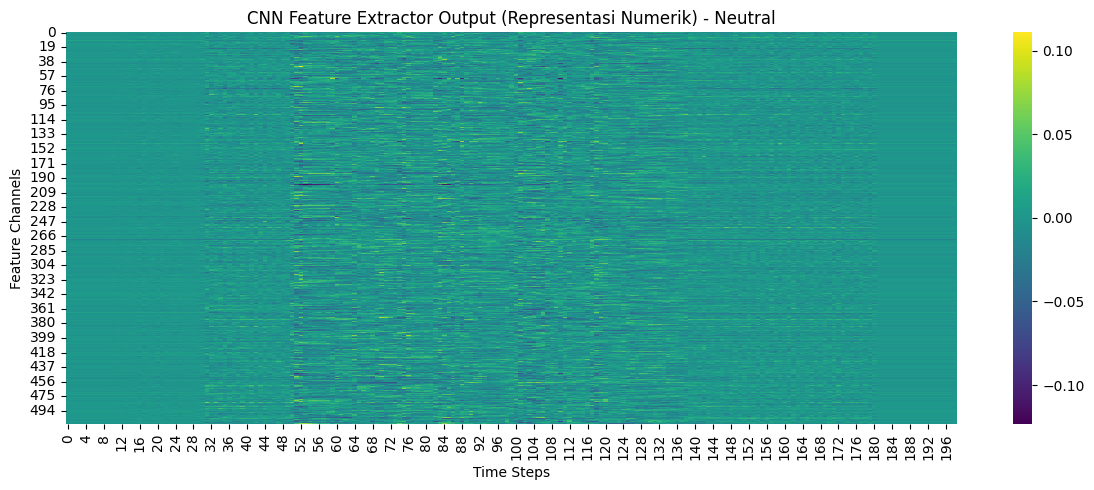

Cuplikan Representasi Numerik [Neutral]:
[[ 0.00256  0.00256  0.00256  0.00256  0.00256]
 [ 0.00022  0.00022  0.00022  0.00022  0.00022]
 [-0.00461 -0.00461 -0.00461 -0.00461 -0.00461]
 [ 0.0046   0.0046   0.0046   0.0046   0.0046 ]
 [-0.00264 -0.00264 -0.00264 -0.00264 -0.00264]]


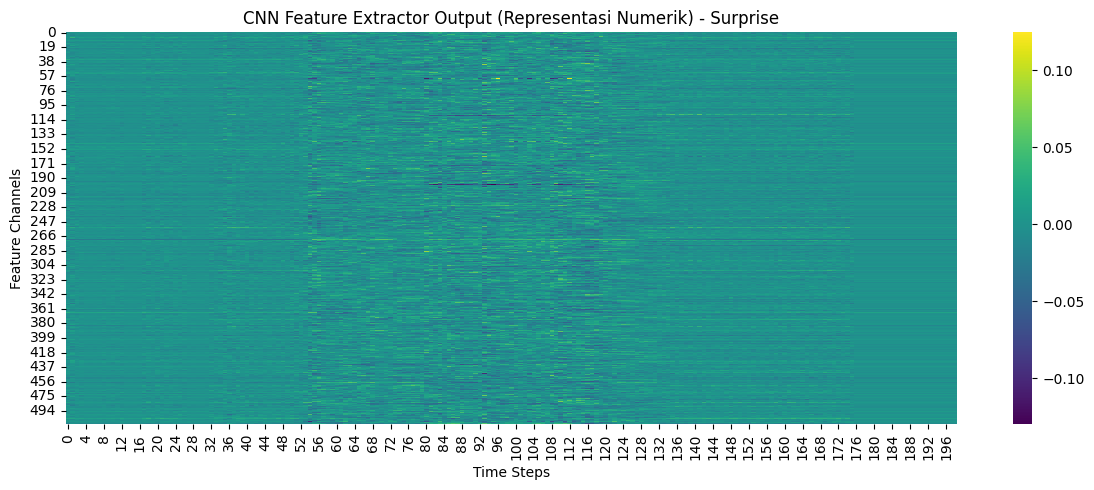

Cuplikan Representasi Numerik [Surprise]:
[[-0.00479  0.0057   0.0032   0.00955  0.00517]
 [-0.00035 -0.00726 -0.00071  0.00184 -0.00121]
 [-0.00189 -0.01046  0.00114 -0.00443 -0.00125]
 [ 0.00425  0.00272  0.00276  0.00543  0.00372]
 [ 0.00011 -0.0154  -0.00563 -0.0046  -0.00331]]


In [23]:
import os
import torch
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import Wav2Vec2Processor, Wav2Vec2Model

# Load model dan processor
model_name = "facebook/wav2vec2-base"
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2Model.from_pretrained(model_name)
model.eval()

# Folder dataset audio (atur sesuai path kamu)
base_dir = r"C:\skripsi\dataset_audio_emotions_16khz_4padded_4emotions"
class_names = ["Disgust", "Happy", "Neutral", "Surprise"]  # bisa tambahkan "Disappointed" jika ada

# Fungsi untuk proses satu file
def process_and_plot(file_path, emotion):
    # Load audio
    waveform, sr = librosa.load(file_path, sr=16000)
    input_values = processor(waveform, return_tensors="pt", sampling_rate=16000).input_values

    # Ambil fitur dari CNN extractor (tanpa transformer)
    with torch.no_grad():
        features = model.feature_extractor(input_values).squeeze(0)

    # Konversi ke NumPy
    features_np = features.cpu().numpy()

    # Plot heatmap
    plt.figure(figsize=(12, 5))
    sns.heatmap(features_np, cmap="viridis", cbar=True)
    plt.title(f"CNN Feature Extractor Output (Representasi Numerik) - {emotion}")
    plt.xlabel("Time Steps")
    plt.ylabel("Feature Channels")
    plt.tight_layout()
    plt.show()

    # Cuplikan nilai numerik
    print(f"Cuplikan Representasi Numerik [{emotion}]:")
    print(np.round(features_np[:5, :5], decimals=5))  # ambil 5x5 pertama

# Proses satu file dari tiap emosi
for emotion in class_names:
    folder_path = os.path.join(base_dir, emotion)
    if not os.path.exists(folder_path):
        print(f"Folder tidak ditemukan: {folder_path}")
        continue
    # Ambil file audio pertama dalam folder
    wav_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
    if not wav_files:
        print(f"Tidak ada file .wav dalam folder: {folder_path}")
        continue
    file_path = os.path.join(folder_path, wav_files[0])
    process_and_plot(file_path, emotion)


c:\skripsi\env\lib\site-packages\transformers\configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Shape fitur CNN: torch.Size([1, 512, 199])

Cuplikan representasi numerik:
[[ 8.0840979e-03  3.7294803e-03 -3.1592010e-03  1.8559056e-03
   6.6405308e-04]
 [-2.6340520e-03  9.7553384e-05 -3.9353692e-03 -3.1326155e-03
  -1.8653201e-03]
 [-1.1433648e-02 -8.6644990e-03 -7.6979911e-03 -7.1535772e-03
  -6.8359212e-03]
 [ 9.3831297e-04  5.6259888e-03  5.1246611e-03  6.7372681e-03
   5.2673058e-03]
 [-6.2226254e-04 -5.0679389e-03 -3.8025079e-03 -2.5901943e-03
  -3.3212076e-03]]


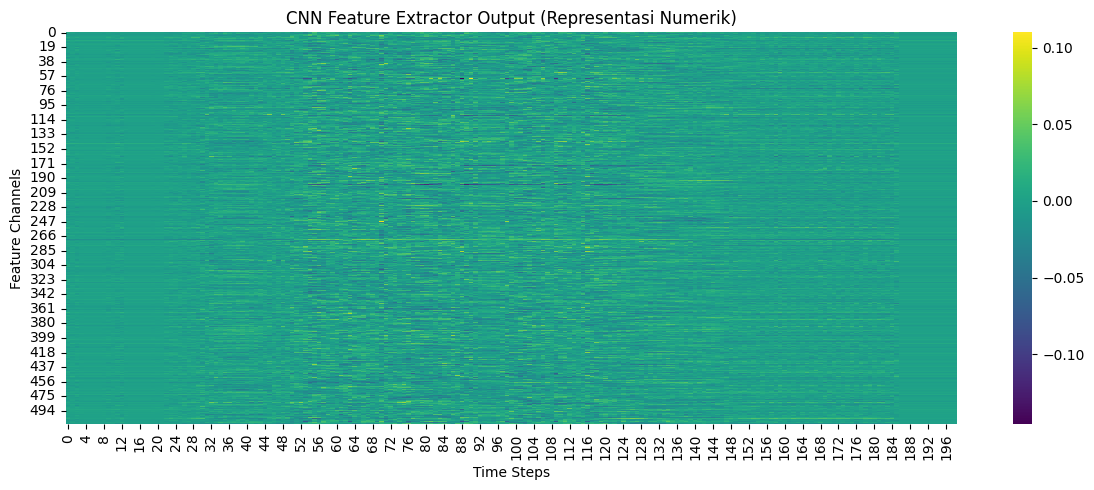

In [22]:
import torch
import torchaudio
from transformers import Wav2Vec2Model, Wav2Vec2Processor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ====== 1. Load audio file ======
file_path = "C:/skripsi/dataset_audio_emotions_16khz_4padded_4emotions/Happy/happy_000.wav"  # ganti dengan path audio Anda
waveform, sr = torchaudio.load(file_path)

# Optional: resample ke 16kHz jika belum
if sr != 16000:
    resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=16000)
    waveform = resampler(waveform)

# ====== 2. Load model dan processor ======
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")

# ====== 3. Preprocessing ======
inputs = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt")

# ====== 4. Extract feature (representasi numerik CNN) ======
with torch.no_grad():
    features = model.feature_extractor(inputs.input_values)

print("Shape fitur CNN:", features.shape)  # (batch_size, feature_dim, time_steps)

# ====== 5. Lihat representasi numerik asli (cuplikan) ======
numeric_array = features.squeeze().numpy()
print("\nCuplikan representasi numerik:")
print(numeric_array[:5, :5])  # menampilkan 5 channel pertama dan 5 time step pertama

# ====== 6. (Opsional) Visualisasi sebagai heatmap ======
plt.figure(figsize=(12, 5))
sns.heatmap(numeric_array, cmap="viridis", cbar=True)
plt.title("CNN Feature Extractor Output (Representasi Numerik)")
plt.xlabel("Time Steps")
plt.ylabel("Feature Channels")
plt.tight_layout()
plt.show()


c:\skripsi\env\lib\site-packages\transformers\configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


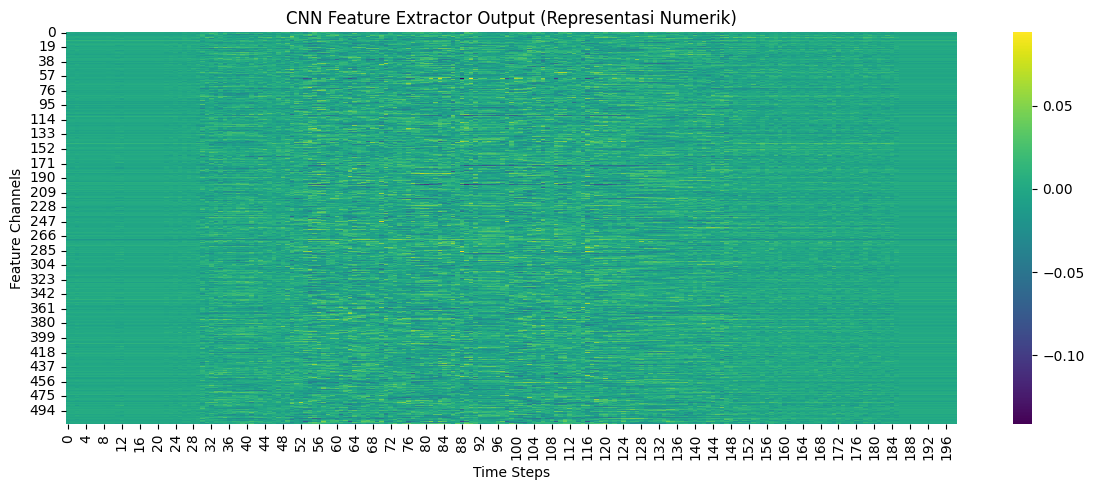

Cuplikan Representasi Numerik:
tensor([[ 1.7590e-03,  1.3577e-03, -7.8552e-05,  1.2476e-03,  1.0463e-03],
        [-1.6563e-03, -1.3368e-03, -3.0546e-03, -1.7146e-03, -1.4981e-03],
        [-8.7518e-03, -7.1784e-03, -8.5491e-03, -7.2800e-03, -7.1057e-03],
        ...,
        [-2.1528e-03,  1.7459e-03,  2.5986e-04,  6.4200e-04,  7.9746e-04],
        [-1.1444e-03, -3.0451e-03, -3.8518e-03, -2.8550e-03, -3.0451e-03],
        [-2.1345e-03, -3.8365e-03,  6.8431e-04, -2.5347e-03, -2.9049e-03]])


In [24]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import Wav2Vec2Processor, Wav2Vec2ForSequenceClassification

# === 1. Load Model dan Processor (gunakan model training kamu jika ada) ===
model_name_or_path = "facebook/wav2vec2-base"  # Ganti jika pakai model hasil fine-tuning
model = Wav2Vec2ForSequenceClassification.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)

# === 2. Load File Audio ===
file_path = "C:/skripsi/dataset_audio_emotions_16khz_4padded_4emotions/Happy/happy_000.wav"  # Ganti ke path file WAV kamu
waveform, sample_rate = torchaudio.load(file_path)

# Resample jika tidak 16kHz
if sample_rate != 16000:
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
    waveform = resampler(waveform)

# === 3. Preprocessing: Mono dan Normalisasi ===
waveform = waveform.mean(dim=0, keepdim=True)  # pastikan mono
waveform = waveform.squeeze(0)  # shape: [samples]

# === 4. Ekstraksi Representasi Numerik dari CNN ===
model.eval()
with torch.no_grad():
    # Input harus berbentuk batch (1, samples)
    features = model.wav2vec2.feature_extractor(waveform.unsqueeze(0))
    features = features.squeeze(0)  # shape: [channels, time_steps]

# === 5. Visualisasi Representasi Numerik ===
plt.figure(figsize=(12, 5))
sns.heatmap(features.numpy(), cmap="viridis", cbar=True)
plt.title("CNN Feature Extractor Output (Representasi Numerik)")
plt.xlabel("Time Steps")
plt.ylabel("Feature Channels")
plt.tight_layout()
plt.show()

# === 6. Print Cuplikan Data ===
print("Cuplikan Representasi Numerik:")
print(features[:, :5])  # Tampilkan 5 time steps pertama


c:\skripsi\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\skripsi\env\lib\site-packages\transformers\configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



=== Processing Disappointed ===
File: C:/skripsi/datasetindo_sorted_preprocess_4s\Disappointed\disappointed_000.wav


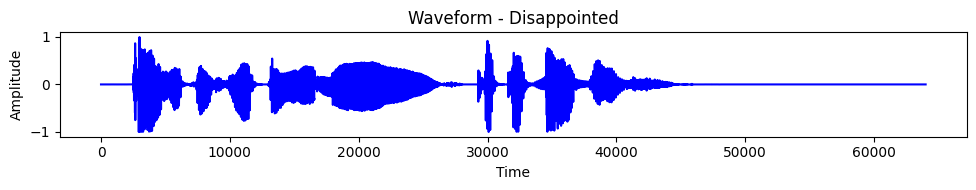

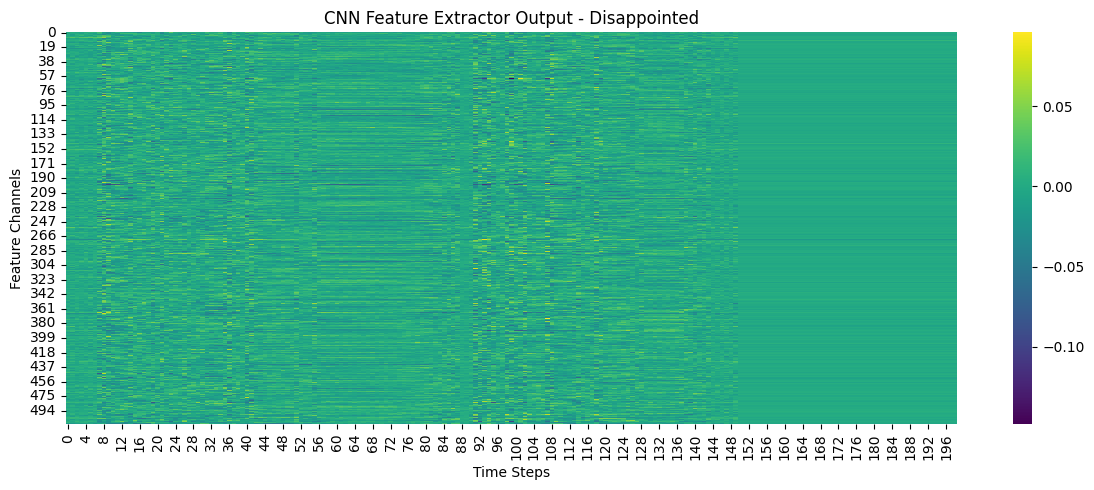

Cuplikan Representasi Numerik:
tensor([[ 7.8182e-05,  4.5578e-03, -6.8074e-04, -2.8610e-03,  4.9556e-03],
        [-1.8708e-03,  1.0859e-03,  1.2700e-03, -6.1470e-03,  7.0681e-03],
        [-1.1272e-04, -1.1957e-02,  7.8604e-03,  6.2793e-03, -1.0836e-03],
        ...,
        [ 1.0957e-02, -6.9387e-04,  2.1425e-03,  6.8110e-03,  7.6752e-03],
        [-1.1846e-03, -4.9915e-04,  8.1032e-03, -8.2454e-03,  2.3232e-03],
        [-1.4803e-02, -1.7493e-02, -8.9733e-03, -1.1174e-02, -5.8465e-03]])

=== Processing Happy ===
File: C:/skripsi/datasetindo_sorted_preprocess_4s\Happy\happy_000.wav


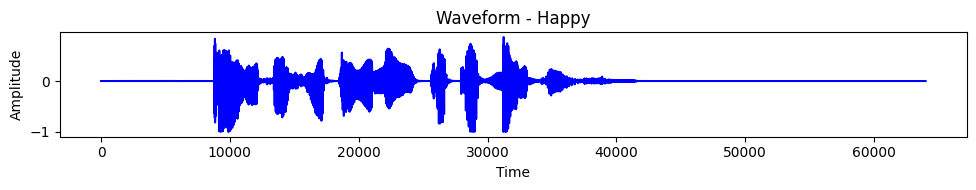

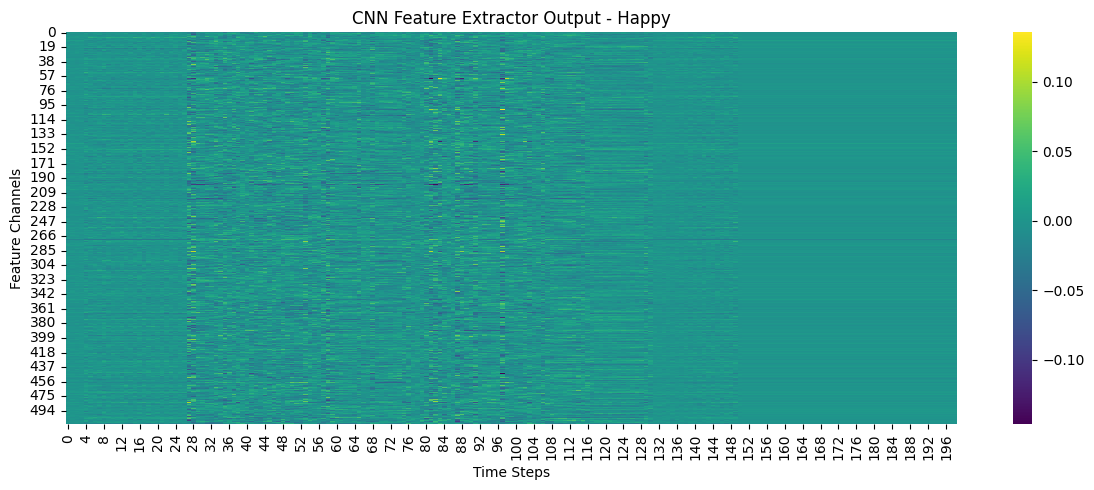

Cuplikan Representasi Numerik:
tensor([[-1.5934e-03, -1.2939e-03, -1.4619e-03, -2.5750e-04, -1.3007e-02],
        [-6.3562e-03,  2.4989e-03,  7.2201e-04, -3.9963e-03,  1.0692e-02],
        [-3.7700e-03, -7.5055e-03, -6.4763e-03, -2.8803e-03, -6.1868e-05],
        ...,
        [-3.2760e-04, -1.3111e-03,  2.1971e-03, -2.1230e-03, -1.1313e-02],
        [ 1.4147e-03,  1.3737e-03, -2.3364e-03, -7.2034e-04,  5.5245e-03],
        [-2.4425e-03, -5.8901e-03, -3.5462e-03, -7.0325e-03, -1.3522e-02]])

=== Processing Disgust ===
File: C:/skripsi/datasetindo_sorted_preprocess_4s\Disgust\disgust_000.wav


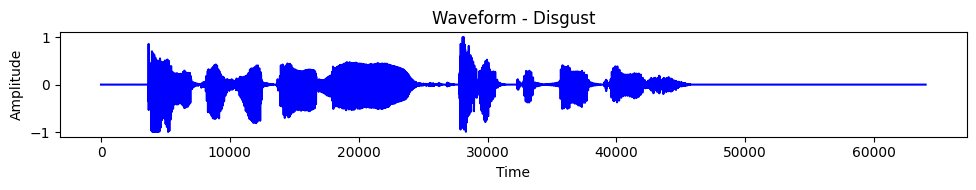

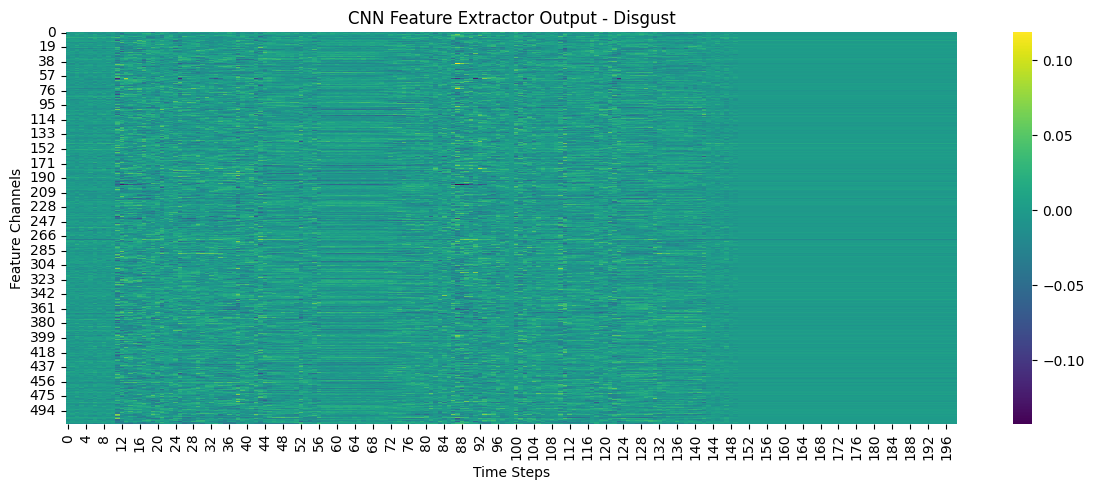

Cuplikan Representasi Numerik:
tensor([[ 0.0030, -0.0028, -0.0011,  0.0019, -0.0071],
        [-0.0094,  0.0018,  0.0035,  0.0106,  0.0031],
        [-0.0033, -0.0053,  0.0136, -0.0024, -0.0012],
        ...,
        [ 0.0079,  0.0037,  0.0029,  0.0056, -0.0034],
        [ 0.0069, -0.0054, -0.0032, -0.0061, -0.0032],
        [-0.0051, -0.0144, -0.0091, -0.0104, -0.0089]])

=== Processing Neutral ===
File: C:/skripsi/datasetindo_sorted_preprocess_4s\Neutral\neutral_000.wav


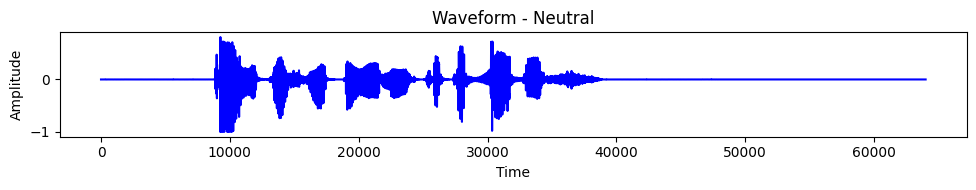

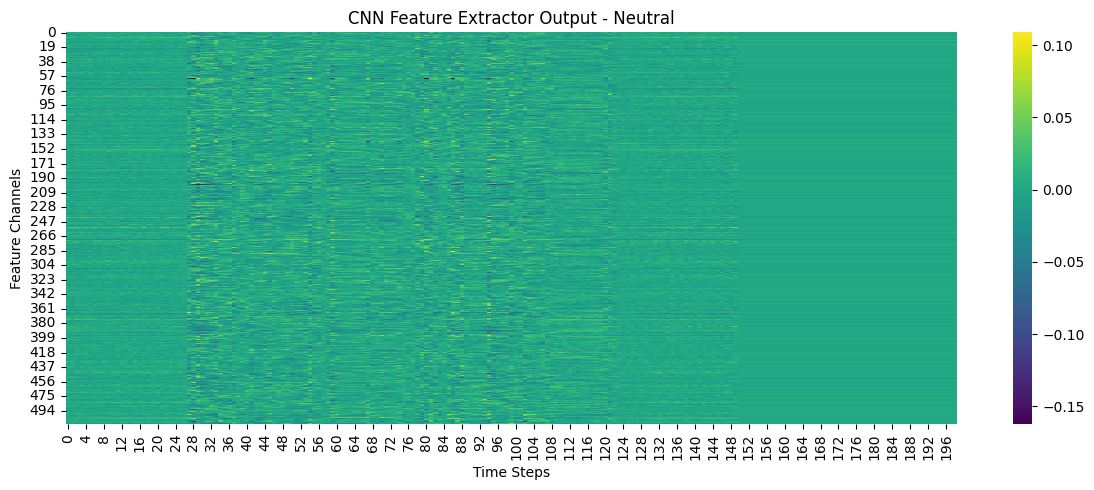

Cuplikan Representasi Numerik:
tensor([[ 0.0031,  0.0007,  0.0029,  0.0023,  0.0003],
        [-0.0042, -0.0013,  0.0174,  0.0035,  0.0012],
        [-0.0081, -0.0092, -0.0137, -0.0059, -0.0056],
        ...,
        [-0.0049,  0.0037, -0.0010,  0.0007,  0.0047],
        [-0.0016, -0.0061,  0.0095, -0.0037,  0.0037],
        [-0.0030, -0.0075, -0.0136, -0.0096, -0.0184]])

=== Processing Surprise ===
File: C:/skripsi/datasetindo_sorted_preprocess_4s\Surprise\surprise_000.wav


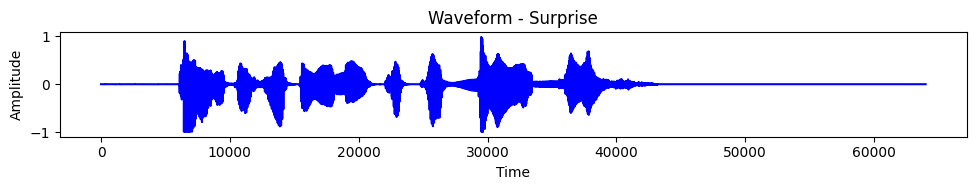

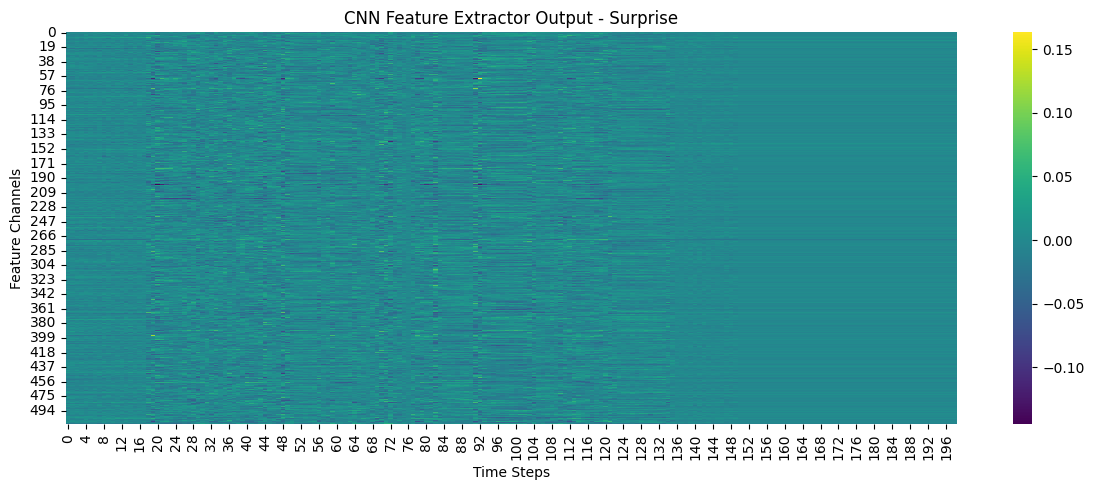

Cuplikan Representasi Numerik:
tensor([[-5.7853e-03, -3.7076e-03, -1.8345e-03,  2.3229e-04,  5.4647e-03],
        [-9.9750e-04,  3.9845e-03,  1.8802e-03,  2.5549e-03, -1.5757e-03],
        [ 5.0970e-03, -1.0793e-02, -6.8127e-03, -1.1901e-02,  9.0554e-03],
        ...,
        [ 1.0679e-02, -1.2959e-03,  7.6454e-03,  3.6316e-03,  6.7427e-03],
        [ 5.8100e-03,  4.8294e-05, -1.1523e-03,  7.8671e-03,  8.9049e-03],
        [-1.9887e-02, -1.9421e-02, -1.3702e-02, -1.5974e-02, -1.9324e-02]])


In [1]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import Wav2Vec2Processor, Wav2Vec2ForSequenceClassification

# Path utama ke folder dataset kamu
base_dir = "C:/skripsi/datasetindo_sorted_preprocess_4s"
emotion_classes = ["Disappointed","Happy", "Disgust", "Neutral", "Surprise"]  # Pastikan kapital sesuai folder

# Load model dan processor
model_name_or_path = "facebook/wav2vec2-base"  # atau model hasil fine-tuning kamu
model = Wav2Vec2ForSequenceClassification.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)

# Set model ke eval mode
model.eval()

for emotion in emotion_classes:
    # Cari satu file contoh dari folder tersebut
    folder_path = os.path.join(base_dir, emotion)
    files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
    if not files:
        print(f"Tidak ada file WAV di {folder_path}")
        continue

    file_path = os.path.join(folder_path, files[0])
    print(f"\n=== Processing {emotion} ===")
    print(f"File: {file_path}")

    # Load audio
    waveform, sample_rate = torchaudio.load(file_path)
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
        waveform = resampler(waveform)

    # Preprocessing: mono dan normalisasi
    waveform = waveform.mean(dim=0, keepdim=True).squeeze(0)

    # Visualisasi waveform
    plt.figure(figsize=(10, 2))
    plt.plot(waveform.numpy(), color='blue')
    plt.title(f"Waveform - {emotion}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    # Ekstraksi fitur numerik
    with torch.no_grad():
        features = model.wav2vec2.feature_extractor(waveform.unsqueeze(0))
        features = features.squeeze(0)

    # Visualisasi representasi numerik sebagai heatmap
    plt.figure(figsize=(12, 5))
    sns.heatmap(features.numpy(), cmap="viridis", cbar=True)
    plt.title(f"CNN Feature Extractor Output - {emotion}")
    plt.xlabel("Time Steps")
    plt.ylabel("Feature Channels")
    plt.tight_layout()
    plt.show()

    # Print cuplikan
    print("Cuplikan Representasi Numerik:")
    print(features[:, :5])


c:\skripsi\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\skripsi\env\lib\site-packages\transformers\configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



=== Processing Happy ===
File: C:/skripsi/dataset_audio_emotions_16khz_4padded_4emotions\Happy\happy_000.wav


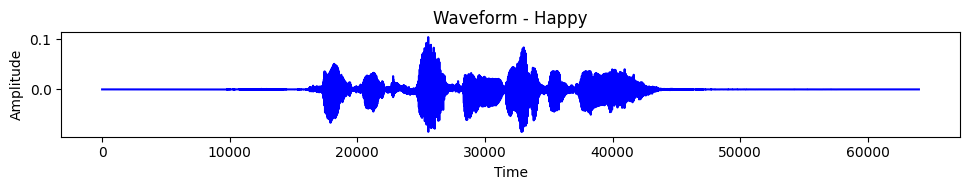

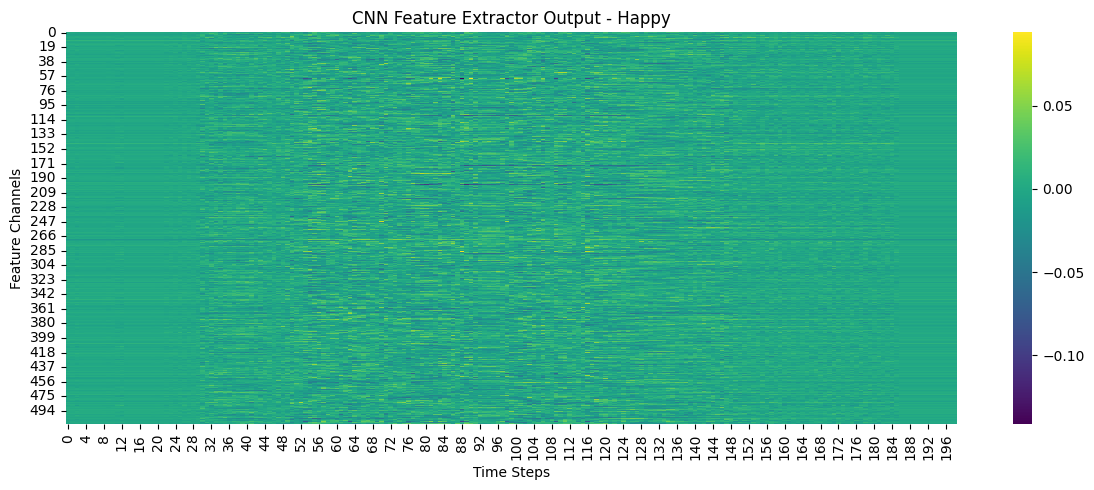

Cuplikan Representasi Numerik:
tensor([[ 1.7590e-03,  1.3577e-03, -7.8552e-05,  1.2476e-03,  1.0463e-03],
        [-1.6563e-03, -1.3368e-03, -3.0546e-03, -1.7146e-03, -1.4981e-03],
        [-8.7518e-03, -7.1784e-03, -8.5491e-03, -7.2800e-03, -7.1057e-03],
        ...,
        [-2.1528e-03,  1.7459e-03,  2.5986e-04,  6.4200e-04,  7.9746e-04],
        [-1.1444e-03, -3.0451e-03, -3.8518e-03, -2.8550e-03, -3.0451e-03],
        [-2.1345e-03, -3.8365e-03,  6.8431e-04, -2.5347e-03, -2.9049e-03]])

=== Processing Disgust ===
File: C:/skripsi/dataset_audio_emotions_16khz_4padded_4emotions\Disgust\disgust_000.wav


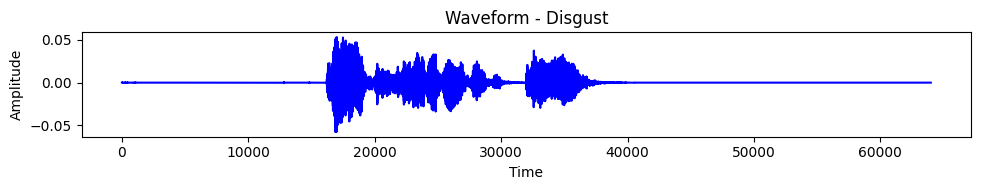

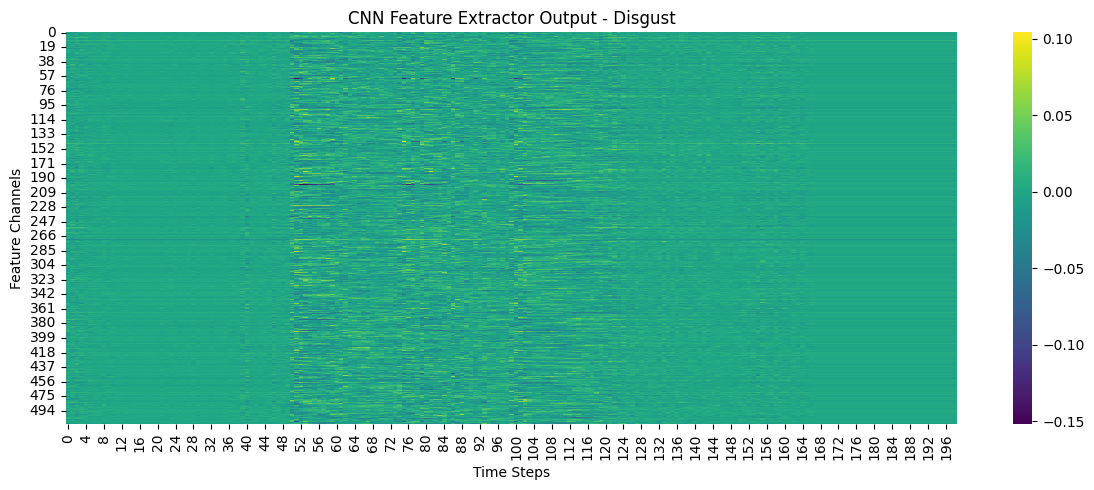

Cuplikan Representasi Numerik:
tensor([[-0.0033, -0.0097, -0.0095,  0.0058,  0.0024],
        [-0.0070, -0.0082,  0.0048, -0.0119,  0.0040],
        [-0.0132, -0.0048, -0.0014, -0.0084, -0.0003],
        ...,
        [ 0.0042, -0.0024,  0.0101,  0.0041, -0.0014],
        [-0.0014, -0.0042, -0.0055,  0.0019,  0.0028],
        [-0.0135, -0.0059, -0.0115,  0.0056,  0.0017]])

=== Processing Neutral ===
File: C:/skripsi/dataset_audio_emotions_16khz_4padded_4emotions\Neutral\neutral_000.wav


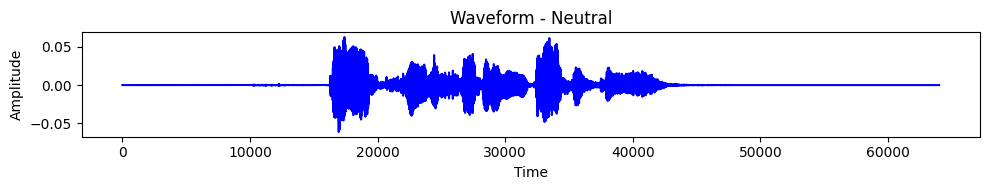

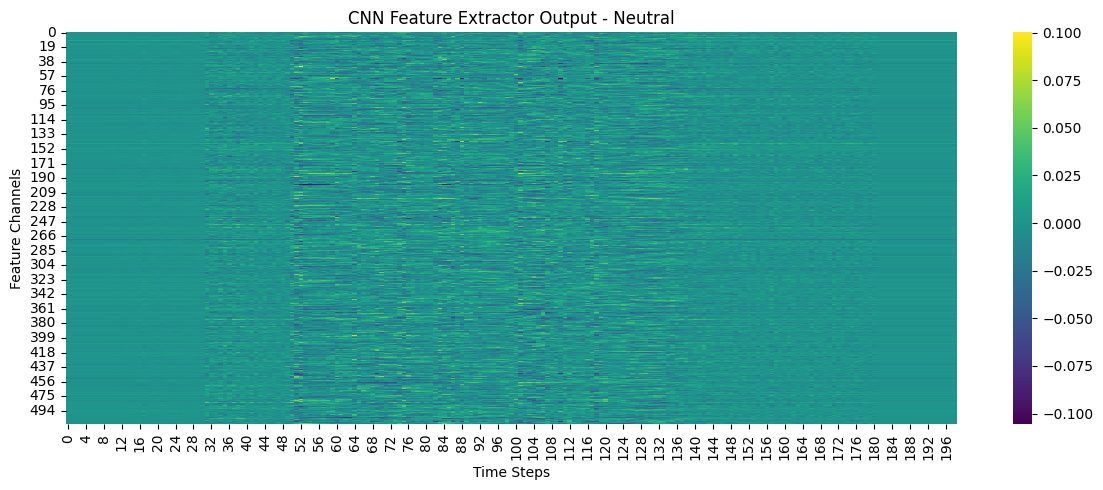

Cuplikan Representasi Numerik:
tensor([[-3.8908e-05, -3.8908e-05, -3.8908e-05, -3.8908e-05, -3.8908e-05],
        [-2.1193e-04, -2.1193e-04, -2.1193e-04, -2.1193e-04, -2.1193e-04],
        [-5.2995e-03, -5.2995e-03, -5.2995e-03, -5.2995e-03, -5.2995e-03],
        ...,
        [-1.8318e-03, -1.8318e-03, -1.8318e-03, -1.8318e-03, -1.8318e-03],
        [-3.0519e-03, -3.0519e-03, -3.0519e-03, -3.0519e-03, -3.0519e-03],
        [-2.4505e-03, -2.4505e-03, -2.4505e-03, -2.4505e-03, -2.4505e-03]])

=== Processing Surprise ===
File: C:/skripsi/dataset_audio_emotions_16khz_4padded_4emotions\Surprise\surprise_000.wav


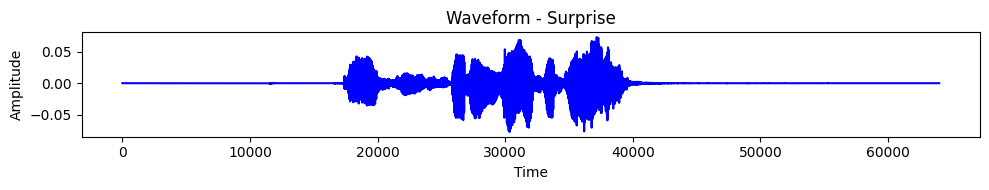

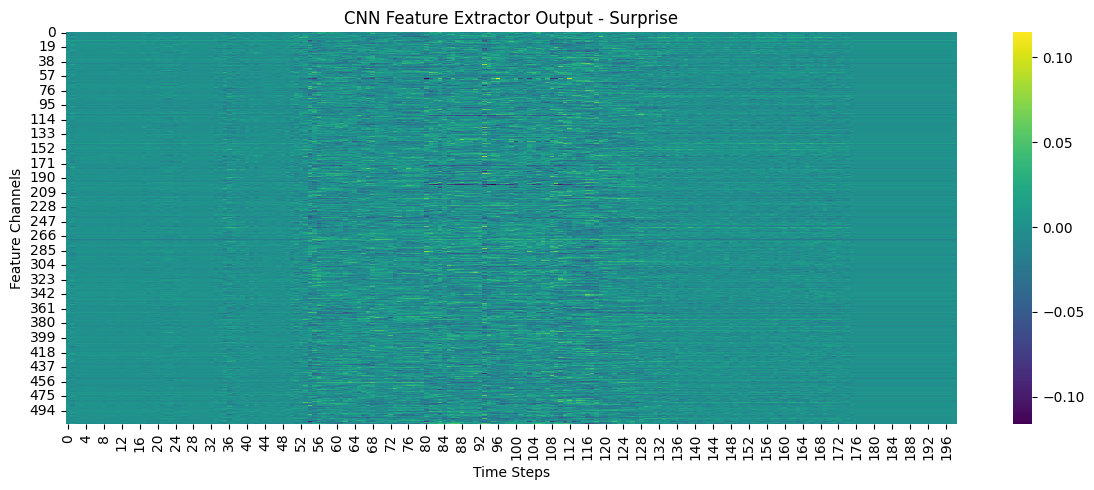

Cuplikan Representasi Numerik:
tensor([[-0.0034, -0.0046, -0.0005,  0.0006, -0.0002],
        [-0.0007, -0.0007, -0.0007,  0.0020, -0.0002],
        [-0.0075, -0.0134, -0.0051, -0.0063, -0.0058],
        ...,
        [-0.0017, -0.0079, -0.0016, -0.0013, -0.0019],
        [-0.0028, -0.0025, -0.0028, -0.0024, -0.0028],
        [-0.0089,  0.0125, -0.0010, -0.0044, -0.0024]])


In [1]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import Wav2Vec2Processor, Wav2Vec2ForSequenceClassification

# Path utama ke folder dataset kamu
base_dir = "C:/skripsi/dataset_audio_emotions_16khz_4padded_4emotions"
emotion_classes = ["Happy", "Disgust", "Neutral", "Surprise"]  # Pastikan kapital sesuai folder

# Load model dan processor
model_name_or_path = "facebook/wav2vec2-base"  # atau model hasil fine-tuning kamu
model = Wav2Vec2ForSequenceClassification.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)

# Set model ke eval mode
model.eval()

for emotion in emotion_classes:
    # Cari satu file contoh dari folder tersebut
    folder_path = os.path.join(base_dir, emotion)
    files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
    if not files:
        print(f"Tidak ada file WAV di {folder_path}")
        continue

    file_path = os.path.join(folder_path, files[0])
    print(f"\n=== Processing {emotion} ===")
    print(f"File: {file_path}")

    # Load audio
    waveform, sample_rate = torchaudio.load(file_path)
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
        waveform = resampler(waveform)

    # Preprocessing: mono dan normalisasi
    waveform = waveform.mean(dim=0, keepdim=True).squeeze(0)

    # Visualisasi waveform
    plt.figure(figsize=(10, 2))
    plt.plot(waveform.numpy(), color='blue')
    plt.title(f"Waveform - {emotion}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    # Ekstraksi fitur numerik
    with torch.no_grad():
        features = model.wav2vec2.feature_extractor(waveform.unsqueeze(0))
        features = features.squeeze(0)

    # Visualisasi representasi numerik sebagai heatmap
    plt.figure(figsize=(12, 5))
    sns.heatmap(features.numpy(), cmap="viridis", cbar=True)
    plt.title(f"CNN Feature Extractor Output - {emotion}")
    plt.xlabel("Time Steps")
    plt.ylabel("Feature Channels")
    plt.tight_layout()
    plt.show()

    # Print cuplikan
    print("Cuplikan Representasi Numerik:")
    print(features[:, :5])


In [ ]:
import os
import torchaudio
import torchaudio.transforms as T

# ==== PATH DATASET ====
input_base = "C:/skripsi/dataset_audio_emotions_16khz_padded_4emotion_592"
output_base = "C:/skripsi/normalized_audio_4emotions_592"  # ganti nama folder output sesuai keinginan
os.makedirs(output_base, exist_ok=True)

# ==== Fungsi Normalisasi Peak ====
def peak_normalize(waveform):
    peak = waveform.abs().max()
    if peak > 0:
        waveform = waveform / peak
    return waveform

# ==== Proses Semua Folder Emosi ====
for emotion_folder in os.listdir(input_base):
    input_emotion_path = os.path.join(input_base, emotion_folder)
    output_emotion_path = os.path.join(output_base, emotion_folder)
    os.makedirs(output_emotion_path, exist_ok=True)

    for file_name in os.listdir(input_emotion_path):
        if file_name.endswith(".wav"):
            input_path = os.path.join(input_emotion_path, file_name)
            output_path = os.path.join(output_emotion_path, file_name)

            # Load dan resample jika perlu
            waveform, sr = torchaudio.load(input_path)

            # Ubah jadi mono
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)

            # Resample ke 16kHz jika belum
            if sr != 16000:
                resampler = T.Resample(orig_freq=sr, new_freq=16000)
                waveform = resampler(waveform)

            # Normalisasi amplitudo
            waveform = peak_normalize(waveform)

            # Simpan hasil
            torchaudio.save(output_path, waveform, 16000)

    print(f"[✓] Normalisasi selesai: {emotion_folder}")


[✓] Normalisasi selesai: Disgusted
[✓] Normalisasi selesai: Happy
[✓] Normalisasi selesai: Neutral
[✓] Normalisasi selesai: Surprised


: 

In [ ]:
import os
import torchaudio
import torchaudio.transforms as T
from pathlib import Path
import torch
import random
import matplotlib.pyplot as plt


# Konfigurasi
SOURCE_DIR = "audio_emotion_4_emotions"
TARGET_DIR = "dataset_audio_emotions_16khz_4padded_4emotions_skripsi"
TARGET_SR = 16000
TARGET_DURATION_SEC = 4
TARGET_NUM_SAMPLES = TARGET_SR * TARGET_DURATION_SEC
MAX_FILES_PER_CLASS = 60

# Seed untuk random sampling reproducible
random.seed(42)

# Pastikan folder output ada
os.makedirs(TARGET_DIR, exist_ok=True)

# Fungsi padding atau trimming
def pad_or_trim(waveform, target_num_samples):
    num_samples = waveform.shape[1]
    if num_samples > target_num_samples:
        return waveform[:, :target_num_samples]
    elif num_samples < target_num_samples:
        padding = target_num_samples - num_samples
        return torch.nn.functional.pad(waveform, (0, padding))
    else:
        return waveform

# Proses semua folder emosi
for emotion in ["Neutral", "Happy", "Surprise", "Disgust"]:
    print(f"🔁 Processing: {emotion}")
    src_folder = os.path.join(SOURCE_DIR, emotion)
    tgt_folder = os.path.join(TARGET_DIR, emotion)
    os.makedirs(tgt_folder, exist_ok=True)

    # Ambil file WAV dan acak
    files = [f for f in os.listdir(src_folder) if f.endswith(".wav")]
    random.shuffle(files)
    files = files[:MAX_FILES_PER_CLASS]

    # Tambahkan ini di dalam loop proses file
    for idx, filename in enumerate(files):
        src_path = os.path.join(src_folder, filename)
        tgt_path = os.path.join(tgt_folder, f"{emotion.lower()}_{idx:03}.wav")

        try:
            waveform, sr = torchaudio.load(src_path)

            # Resample jika perlu
            if sr != TARGET_SR:
                resampler = T.Resample(orig_freq=sr, new_freq=TARGET_SR)
                waveform = resampler(waveform)

            # Mono-kan audio jika stereo
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)

            # Simpan copy sebelum padding
            original_waveform = waveform.clone()

            # Print panjang sebelum
            original_length = original_waveform.shape[1]
            print(f"🎧 {filename} | Sebelum: {original_length} sampel ({original_length / TARGET_SR:.2f} detik)")

            # Lakukan pad/trim
            waveform = pad_or_trim(waveform, TARGET_NUM_SAMPLES)

            # Print panjang sesudah
            final_length = waveform.shape[1]
            print(f"📏 Sesudah: {final_length} sampel ({final_length / TARGET_SR:.2f} detik)")

            # Visualisasi waveform
            plt.figure(figsize=(12, 4))

            # Plot sebelum
            plt.subplot(1, 2, 1)
            plt.plot(original_waveform[0].numpy())
            plt.title(f"{filename} - Sebelum")
            plt.xlabel("Sample Index")
            plt.ylabel("Amplitude")

            # Plot sesudah
            plt.subplot(1, 2, 2)
            plt.plot(waveform[0].numpy())
            plt.title(f"{filename} - Sesudah (4s)")
            plt.xlabel("Sample Index")

            plt.tight_layout()
            plt.show()

            # Simpan
            torchaudio.save(tgt_path, waveform, TARGET_SR)

        except Exception as e:
            print(f"⚠️ Gagal memproses {filename}: {e}")

print("✅ Selesai. Semua file telah di-random, di-resample ke 16kHz, dan disimpan 4 detik.")


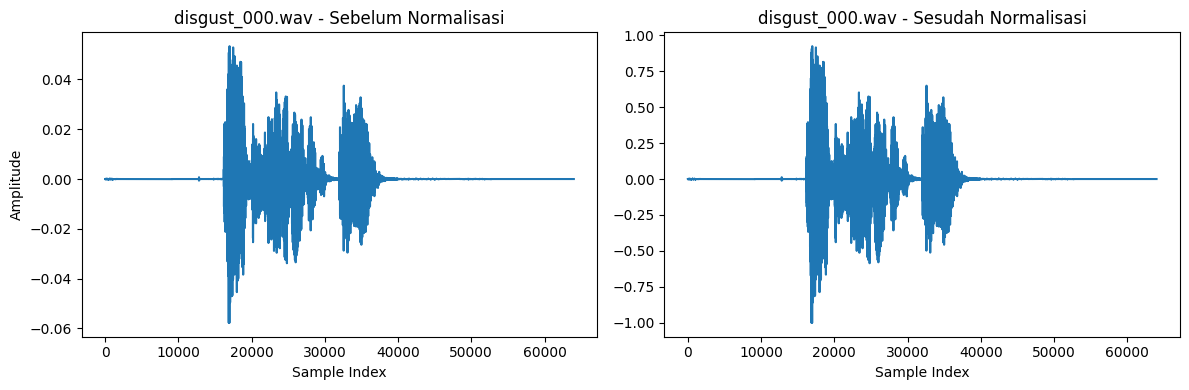

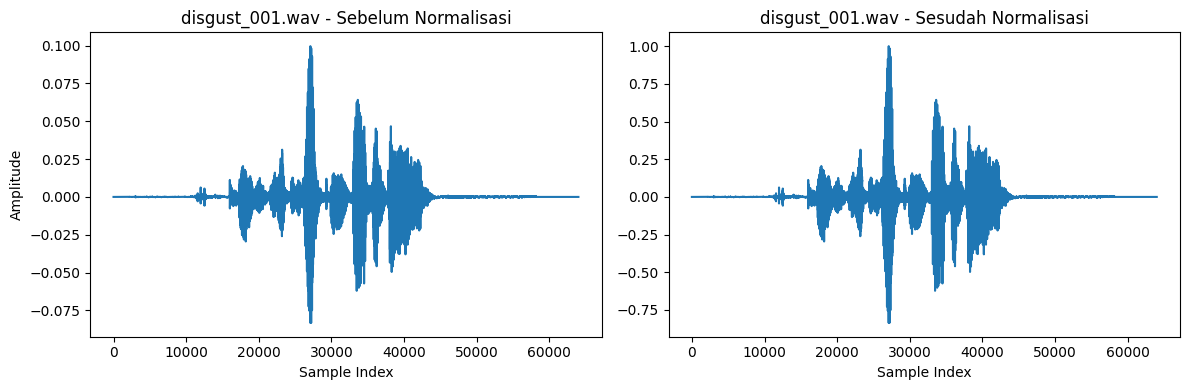

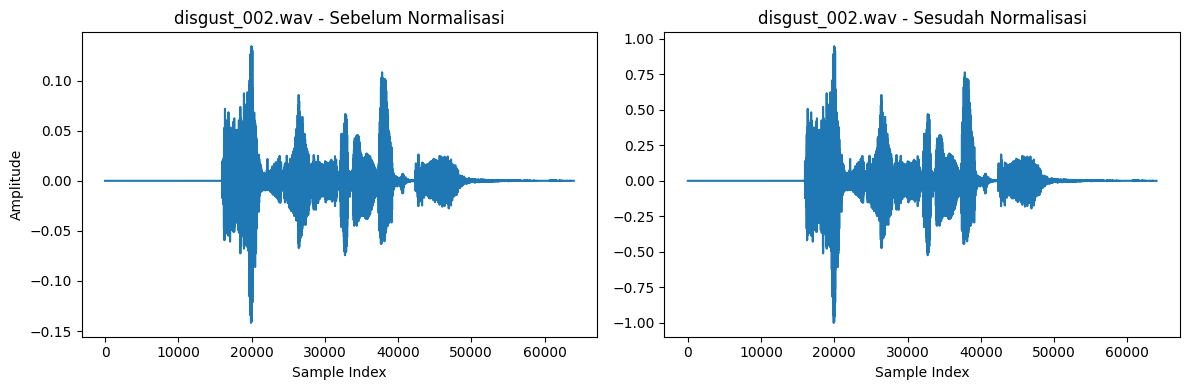

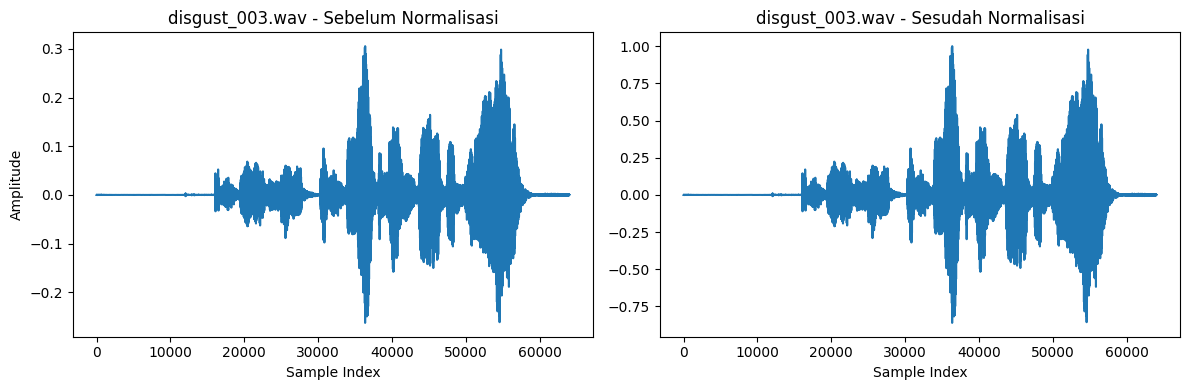

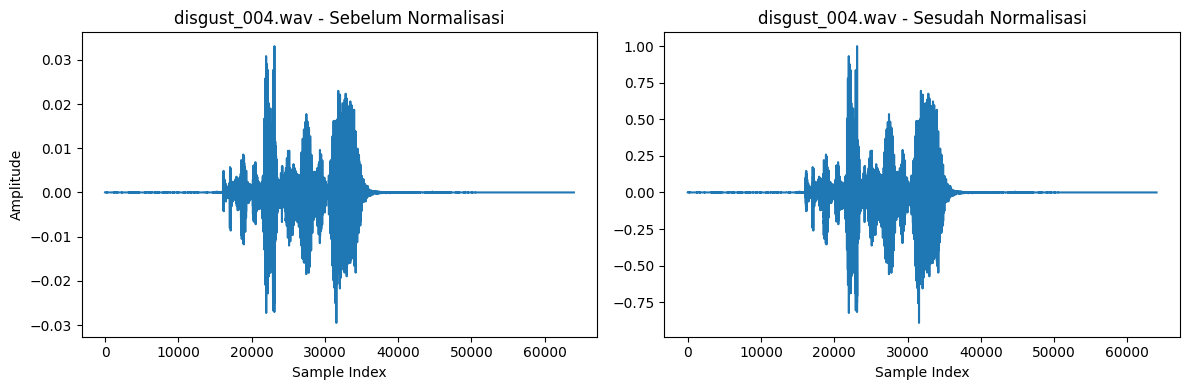

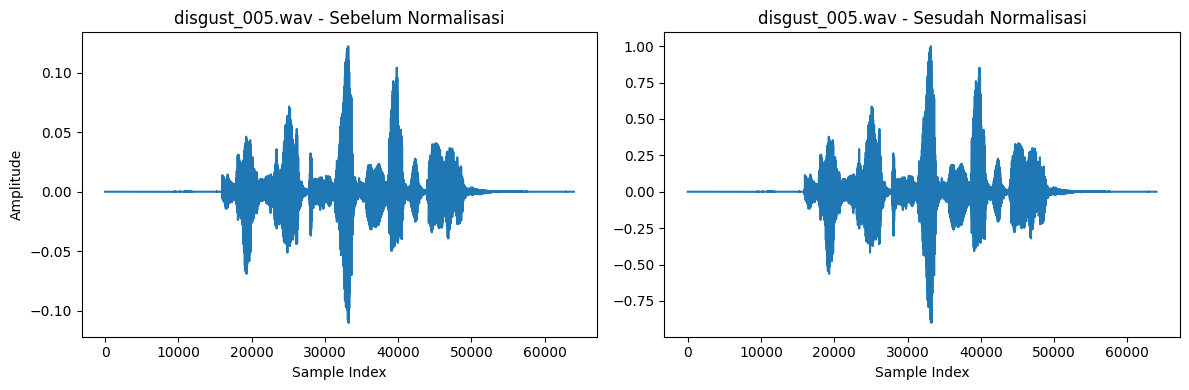

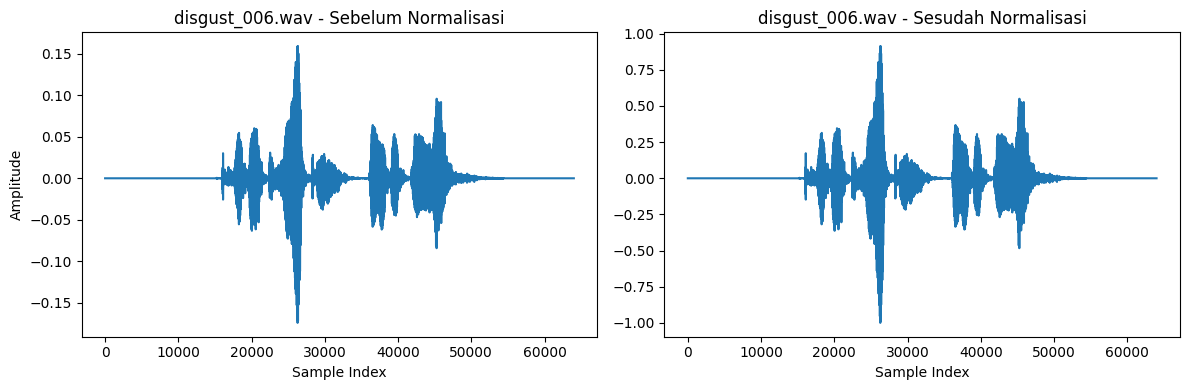

KeyboardInterrupt: 

In [3]:
import os
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

# ==== PATH DATASET ====
input_base = "C:/skripsi/dataset_audio_emotions_16khz_4padded_4emotions"
output_base = "C:/skripsi/normalized_audio_emotions_skripsi"
os.makedirs(output_base, exist_ok=True)

# ==== Fungsi Normalisasi Peak ====
def peak_normalize(waveform):
    peak = waveform.abs().max()
    if peak > 0:
        waveform = waveform / peak
    return waveform

# ==== Proses Semua Folder Emosi ====
for emotion_folder in os.listdir(input_base):
    input_emotion_path = os.path.join(input_base, emotion_folder)
    output_emotion_path = os.path.join(output_base, emotion_folder)
    os.makedirs(output_emotion_path, exist_ok=True)

    for file_name in os.listdir(input_emotion_path):
        if file_name.endswith(".wav"):
            input_path = os.path.join(input_emotion_path, file_name)
            output_path = os.path.join(output_emotion_path, file_name)

            waveform, sr = torchaudio.load(input_path)

            # Mono-kan jika stereo
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)

            # Resample ke 16kHz
            if sr != 16000:
                resampler = T.Resample(orig_freq=sr, new_freq=16000)
                waveform = resampler(waveform)

            # Simpan waveform sebelum normalisasi untuk visualisasi
            waveform_before = waveform.clone()

            # Normalisasi amplitudo (peak)
            waveform_after = peak_normalize(waveform)

            # === Visualisasi ===
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 2, 1)
            plt.plot(waveform_before[0].numpy())
            plt.title(f"{file_name} - Sebelum Normalisasi")
            plt.xlabel("Sample Index")
            plt.ylabel("Amplitude")

            plt.subplot(1, 2, 2)
            plt.plot(waveform_after[0].numpy())
            plt.title(f"{file_name} - Sesudah Normalisasi")
            plt.xlabel("Sample Index")

            plt.tight_layout()
            plt.show()

            # Simpan hasil normalisasi
            torchaudio.save(output_path, waveform_after, 16000)

    print(f"[✓] Normalisasi selesai: {emotion_folder}")
